In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [124]:
dataset = pd.read_csv('train_HP.csv')

In [125]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [126]:
dataset.shape

(1460, 81)

### Verificación de NaN

In [127]:
dataset['LotFrontage'].isnull().sum()

259

In [128]:
def getNanColNames(df):
    colnames = df.columns
    cols_con_na = []
    for col in colnames:
        if(df[col].isnull().sum() > 0):
            cols_con_na.append(col)
    return cols_con_na

In [129]:
cols_con_nan = getNanColNames(dataset)
cols_con_nan

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

### Verificamos tipo de dato de columnas con NaN

In [8]:
dataset[cols_con_nan].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

### Verificamos proporción de NaN

In [130]:
dataset[cols_con_nan].isnull().mean()

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [131]:
def getNanGoodColsNames(df, rate = 0.2):
    cols_procesables = []
    for col in df.columns:
        if((df[col].isnull().mean() < rate)):
            cols_procesables.append(col)
    return cols_procesables

In [132]:
cols_cca = getNanGoodColsNames(dataset, 0.05)
cols_cca

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCond

### Aplicamos criterio de CCA (Complete Case Analysis)

In [133]:
dataset_temp = dataset[cols_cca].dropna()

In [134]:
dataset_temp.shape, dataset.shape

((1412, 70), (1460, 81))

### Imputación de Media y Mediana.

In [135]:
meanValue = np.round(dataset['LotFrontage'].mean(), 0)
medianValue = np.round(dataset['LotFrontage'].median(), 0)

In [136]:
meanValue

70.0

In [137]:
medianValue

69.0

In [138]:
dataset_FL_meanImp = dataset['LotFrontage'].fillna(meanValue)

In [139]:
dataset_FL_medianImp = dataset['LotFrontage'].fillna(medianValue)

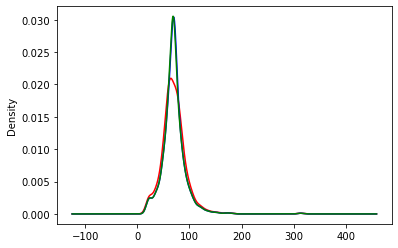

In [140]:
fig = plt.figure()
fig.add_subplot(111)

dataset['LotFrontage'].plot.density(color="red")
dataset_FL_meanImp.plot.density(color="blue")
dataset_FL_medianImp.plot.density(color="green")
plt.show()

In [141]:
np.corrcoef(dataset_FL_meanImp, dataset['SalePrice'])[0,1]

0.3348971832698149

In [142]:
np.corrcoef(dataset_FL_medianImp, dataset['SalePrice'])

array([[1.        , 0.33477085],
       [0.33477085, 1.        ]])

In [143]:
dataset['LotFrontage'] = dataset['LotFrontage'].fillna(meanValue)

### Se valida la imputación de mediana y confirmamos cantidad de nulos en cero

In [144]:
dataset['LotFrontage'].isnull().sum()

0

### Imputación Arbitraria (Cargamos de nuevo el DS para realizar otro tipo de imputación)

In [145]:
dataset = pd.read_csv('train_HP.csv')

In [146]:
dataset_IA = dataset

In [147]:
dataset_IA['LotFrontage'].isnull().sum()

259

In [148]:
dataset_IA['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [149]:
dataset_IA['LotFrontage_320'] = dataset_IA['LotFrontage'].fillna(320)
dataset_IA['LotFrontage_-1'] = dataset_IA['LotFrontage'].fillna(-1)

In [150]:
print("Varianza original: ", dataset_IA['LotFrontage'].var())
print("Varianza 320: ", dataset_IA['LotFrontage_320'].var())
print("Varianza -1: ", dataset_IA['LotFrontage_-1'].var())

Varianza original:  589.7491687482642
Varianza 320:  9608.128489207307
Varianza -1:  1222.218454655557


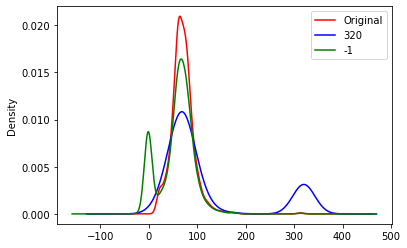

In [151]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_IA['LotFrontage'].plot.density(color="red", label="Original")
dataset_IA['LotFrontage_320'].plot.density(color="blue", label="320")
dataset_IA['LotFrontage_-1'].plot.density(color="green", label="-1")
ax.legend()
plt.show()

In [152]:
np.corrcoef(dataset_IA['LotFrontage_320'], dataset_IA['SalePrice'])[0,1]

0.07922997678157287

In [33]:
np.corrcoef(dataset_IA['LotFrontage_-1'], dataset_IA['SalePrice'])[0,1]

0.20780481756776292

## Imputación de Categorias Faltantes

In [153]:
dataset_cat_missing = dataset[['BsmtQual', 'FireplaceQu', 'SalePrice']]

In [154]:
dataset_cat_missing.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [155]:
dataset_cat_missing.isnull().sum()

BsmtQual        37
FireplaceQu    690
SalePrice        0
dtype: int64

In [156]:
dataset_cat_missing.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [157]:
dataset_cat_missing['BsmtQual'].value_counts()/len(dataset_cat_missing)

TA    0.444521
Gd    0.423288
Ex    0.082877
Fa    0.023973
Name: BsmtQual, dtype: float64

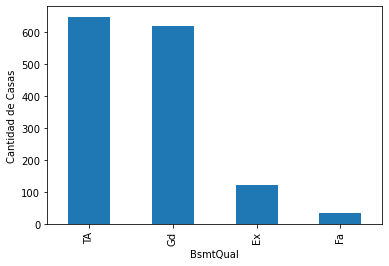

In [158]:
dataset_cat_missing['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.ylabel("Cantidad de Casas")
plt.xlabel("BsmtQual")
plt.show()

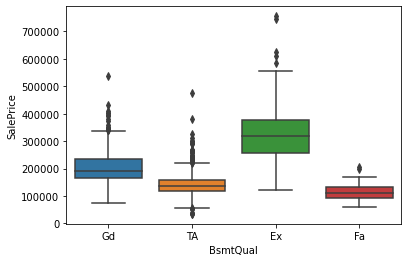

In [159]:
import seaborn as sns
sales = dataset_cat_missing['SalePrice']
bsq = dataset_cat_missing['BsmtQual']
sns.boxplot(x=bsq, y=sales)
plt.show()

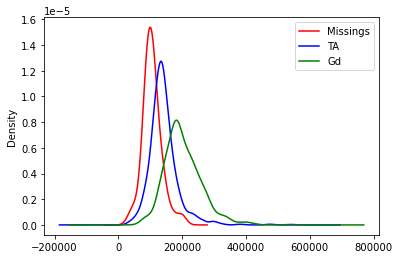

In [160]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['BsmtQual'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'TA']['SalePrice'].plot(kind="kde", color="blue", label="TA")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'Gd']['SalePrice'].plot(kind="kde", color="green", label="Gd")
ax.legend()
plt.show()

In [161]:
dataset_cat_missing['BsmtQual'].fillna('TA', inplace=True) #imputación de categoria

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


#### FireplaceQu

In [162]:
dataset_cat_missing['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

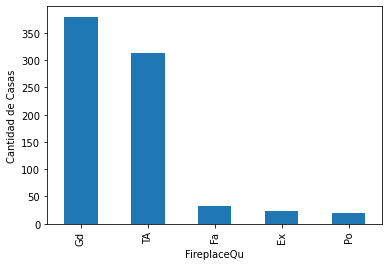

In [163]:
dataset_cat_missing['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.ylabel("Cantidad de Casas")
plt.xlabel("FireplaceQu")
plt.show()

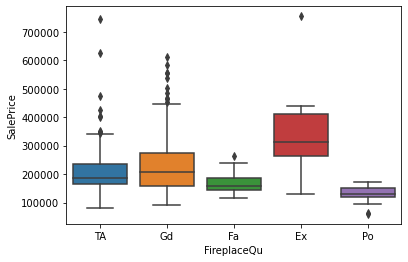

In [164]:
import seaborn as sns
sales = dataset_cat_missing['SalePrice']
bsq = dataset_cat_missing['FireplaceQu']
sns.boxplot(x=bsq, y=sales)
plt.show()

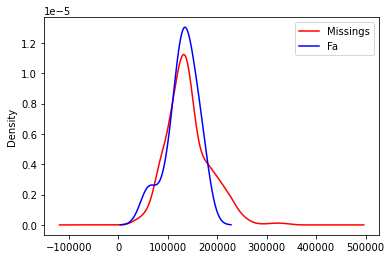

In [165]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['FireplaceQu'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['FireplaceQu'] == 'Po']['SalePrice'].plot(kind="kde", color="blue", label="Fa")
ax.legend()
plt.show()

In [166]:
dataset_cat_missing['FireplaceQu'].fillna('Missing', inplace=True) #imputación de categoria con indicador de faltante.

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


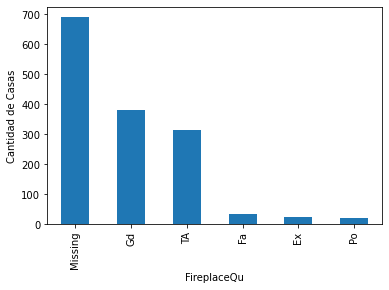

In [167]:
dataset_cat_missing['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.ylabel("Cantidad de Casas")
plt.xlabel("FireplaceQu")
plt.show()

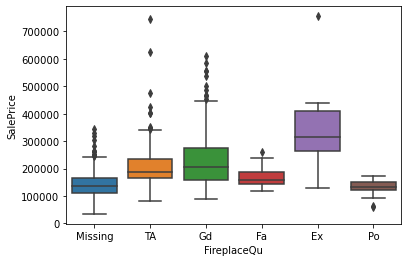

In [168]:
import seaborn as sns
sales = dataset_cat_missing['SalePrice']
bsq = dataset_cat_missing['FireplaceQu']
sns.boxplot(x=bsq, y=sales)
plt.show()

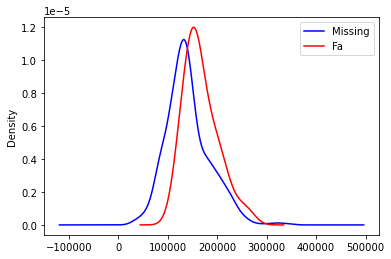

In [169]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['FireplaceQu'] == 'Missing']['SalePrice'].plot(kind="kde", color="blue", label="Missing")
dataset_cat_missing[dataset_cat_missing['FireplaceQu'] == 'Fa']['SalePrice'].plot(kind="kde", color="red", label="Fa")

ax.legend()
plt.show()

## Codificación de Variables Categóricas

In [170]:
def getCategoryVars(df):
    colnames = df.columns
    cat_cols = []
    for col in colnames:
        if(df[col].dtype == 'object'):
            cat_cols.append(col)
    return cat_cols

In [171]:
cat_cols = getCategoryVars(dataset)

In [172]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [173]:
cat_cols.append('SalePrice')

In [174]:
dataset_categorics = dataset[cat_cols]

In [175]:
dataset_cat = dataset_categorics

In [176]:
dataset_categorics.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000


In [177]:
dataset_categorics['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

#### One Hot Encoding

In [179]:
pd.get_dummies(dataset_cat['MSZoning'])

,C (all),FV,RH,RL,RM
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
1455,0,0,0,1,0
1456,0,0,0,1,0
1457,0,0,0,1,0
1458,0,0,0,1,0


In [180]:
pd.get_dummies(dataset_categorics)

,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,181500,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,223500,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,140000,0,0,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,250000,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,210000,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,266500,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,142125,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


### Frequency Encoding

In [181]:
dataset_categorics['KitchenQual'].value_counts().sort_values(ascending=False)

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

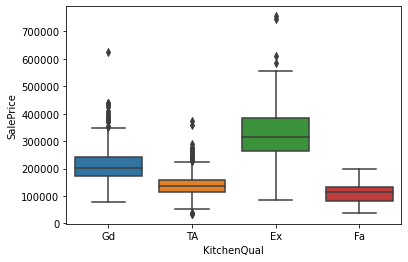

In [182]:
sales = dataset_categorics['SalePrice']
ktq = dataset_categorics['KitchenQual']
sns.boxplot(x=ktq, y=sales)
plt.show()

In [183]:
freq_mapper = (dataset_categorics['KitchenQual'].value_counts().sort_values(ascending=False)).to_dict()
freq_mapper

{'TA': 735, 'Gd': 586, 'Ex': 100, 'Fa': 39}

In [184]:
dataset_categorics['KitchenQual'] = dataset_categorics['KitchenQual'].map(freq_mapper) 

C:\Users\wnajera\AppData\Local\Temp/ipykernel_17652/90959443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categorics['KitchenQual'] = dataset_categorics['KitchenQual'].map(freq_mapper)


In [185]:
density_mapper = (dataset_categorics['KitchenQual'].value_counts().sort_values(ascending=False)/len(dataset_categorics['KitchenQual'])).to_dict()
density_mapper

{735: 0.5034246575342466,
 586: 0.40136986301369865,
 100: 0.0684931506849315,
 39: 0.02671232876712329}

In [186]:
dataset = pd.read_csv('train_HP.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [187]:
def executeFreqEncoding(df, map_type='freq'):
    colnames = df.columns
    for col in colnames:
        if(df[col].dtype == 'object'):
            factor_div = 1 if (map_type == 'freq') else len(df[col])
            mapper = (df[col].value_counts().sort_values(ascending=False)/factor_div).to_dict()
            df[col] = df[col].map(mapper) 

In [188]:
dataset_temp = dataset

In [189]:
executeFreqEncoding(dataset_temp)

In [190]:
dataset_temp

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,1151.0,65.0,8450,1454.0,NaN,925.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,2,2008,1267.0,1198.0,208500
1,2,20,1151.0,80.0,9600,1454.0,NaN,925.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,5,2007,1267.0,1198.0,181500
2,3,60,1151.0,68.0,11250,1454.0,NaN,484.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,9,2008,1267.0,1198.0,223500
3,4,70,1151.0,60.0,9550,1454.0,NaN,484.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,2,2006,1267.0,101.0,140000
4,5,60,1151.0,84.0,14260,1454.0,NaN,484.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,12,2008,1267.0,1198.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,1151.0,62.0,7917,1454.0,NaN,925.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,8,2007,1267.0,1198.0,175000
1456,1457,20,1151.0,85.0,13175,1454.0,NaN,925.0,1311.0,1459.0,...,0,NaN,157.0,NaN,0,2,2010,1267.0,1198.0,210000
1457,1458,70,1151.0,66.0,9042,1454.0,NaN,925.0,1311.0,1459.0,...,0,NaN,59.0,49.0,2500,5,2010,1267.0,1198.0,266500
1458,1459,20,1151.0,68.0,9717,1454.0,NaN,925.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,4,2010,1267.0,1198.0,142125


### Transformación de Variables Numéricas:

In [191]:
import scipy.stats as stats

In [192]:
len(dataset['LotArea'].unique())

1073

In [193]:
def getContinuesCols(df):
    colnames = df.columns
    numeric_continues_vars = []
    for col in colnames:
        unique_values =len (df[col].unique())
        if((df[col].dtype != 'object') and (unique_values > 30)):
            numeric_continues_vars.append(col)
    return numeric_continues_vars

In [194]:
numeric_cont_vars = getContinuesCols(dataset)
numeric_cont_vars

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [195]:
def plot_density_variable(df, variable):
    
    plt.figure(figsize = (15,6))
    plt.subplot(121)
    df[variable].hist(bins=30)
    plt.title(variable)
    
    plt.subplot(122)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

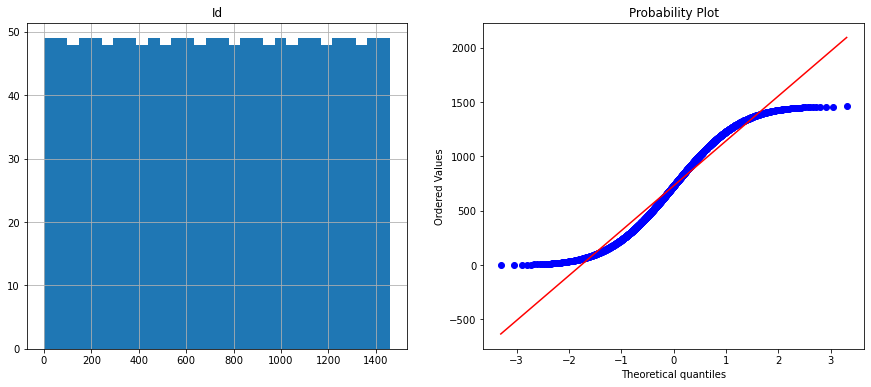

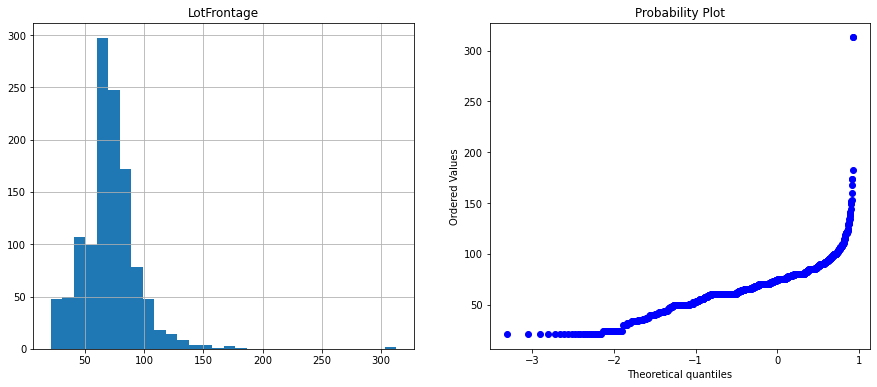

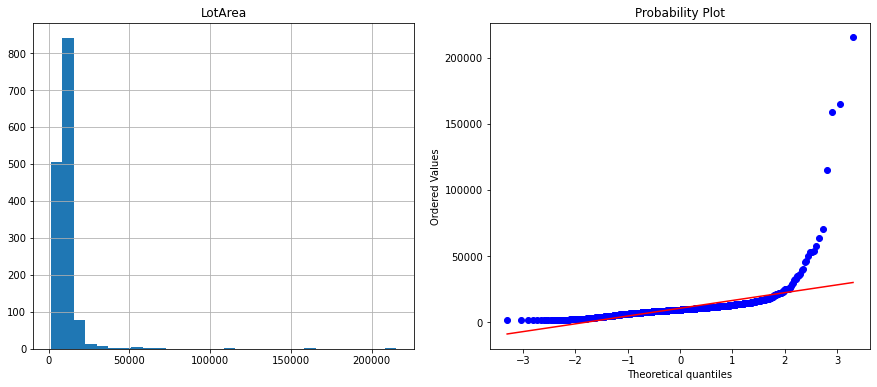

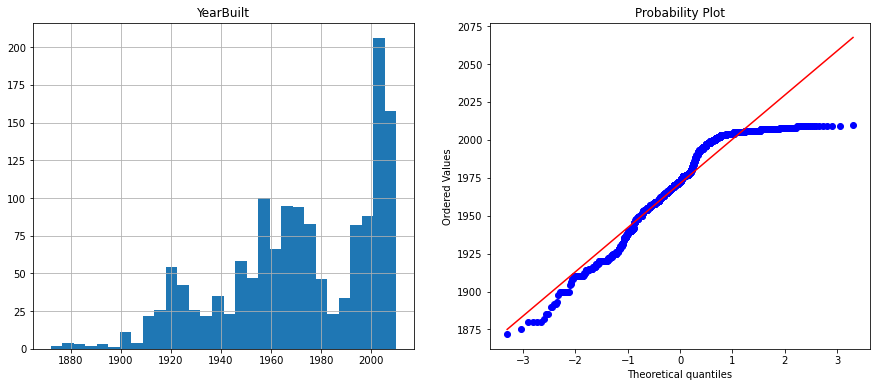

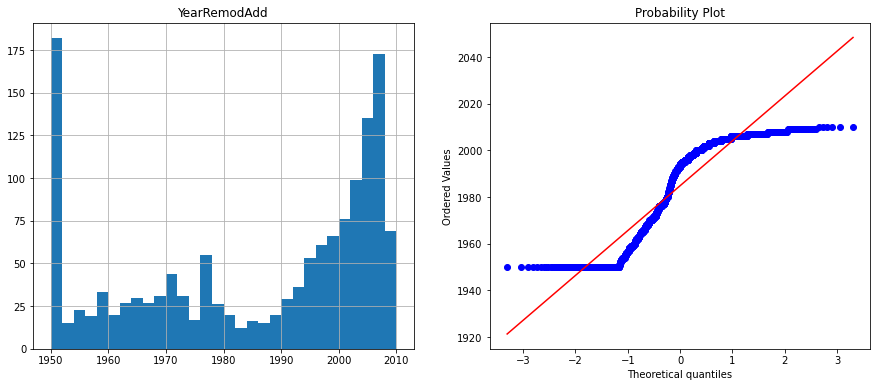

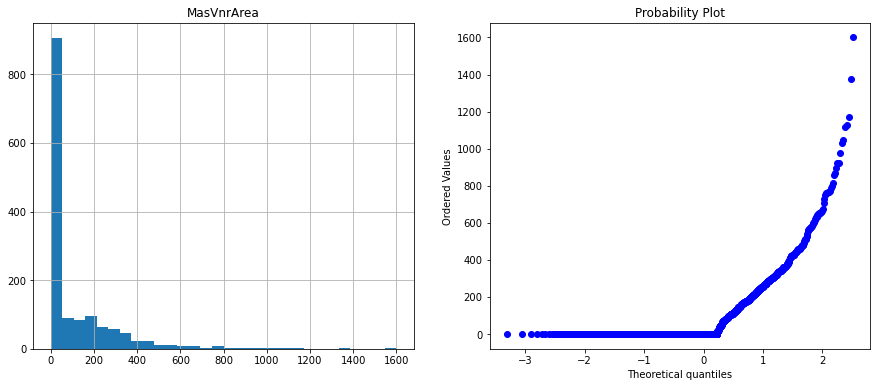

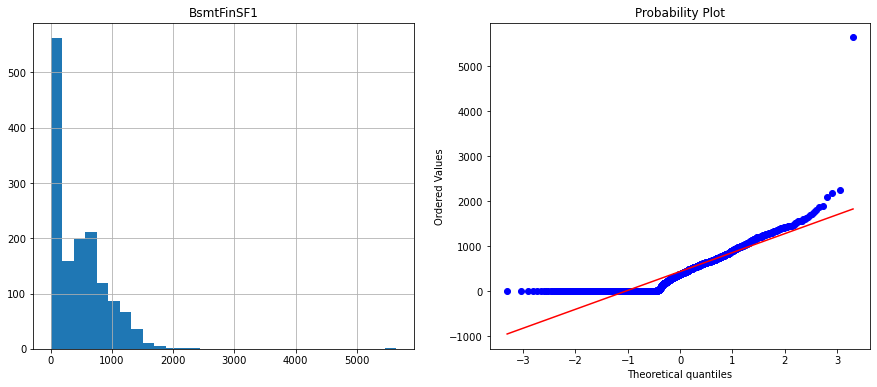

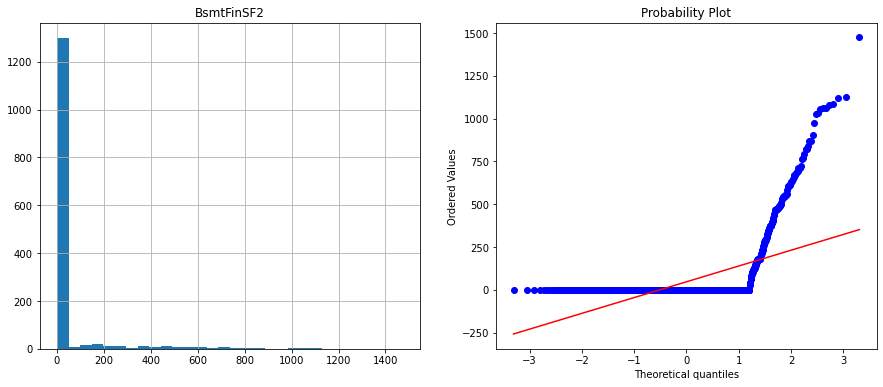

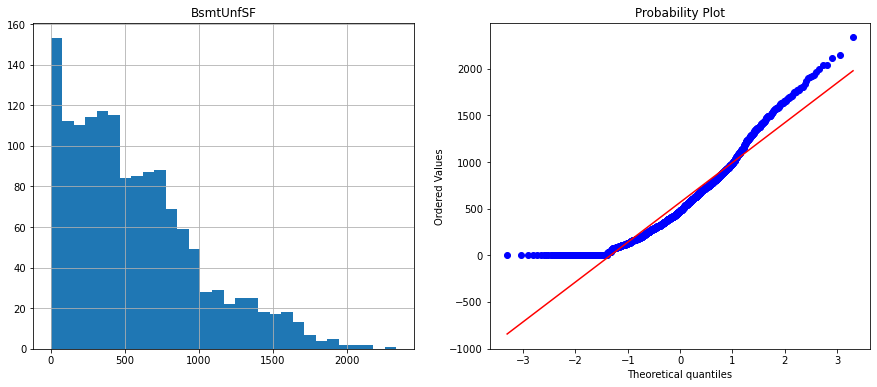

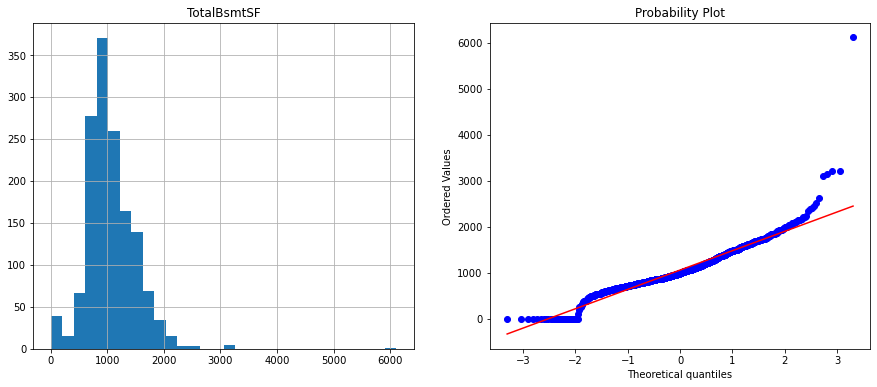

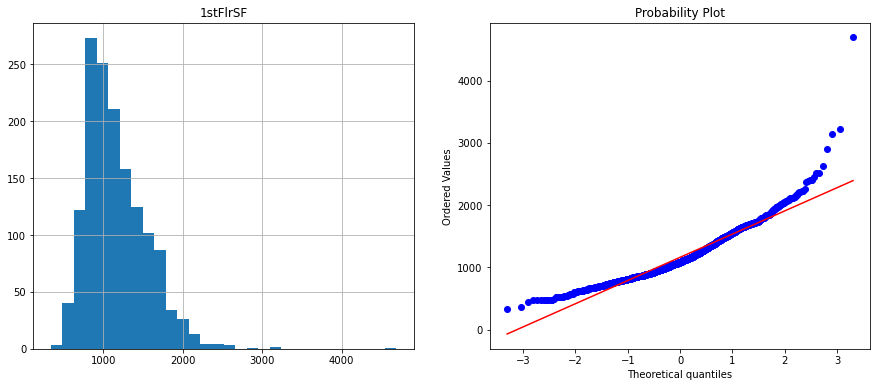

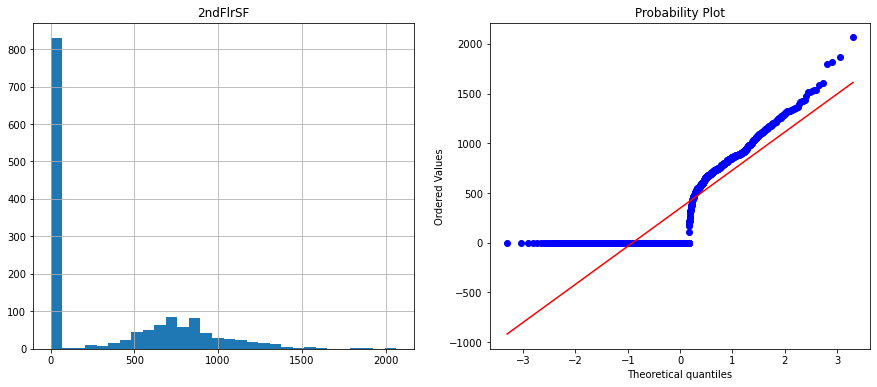

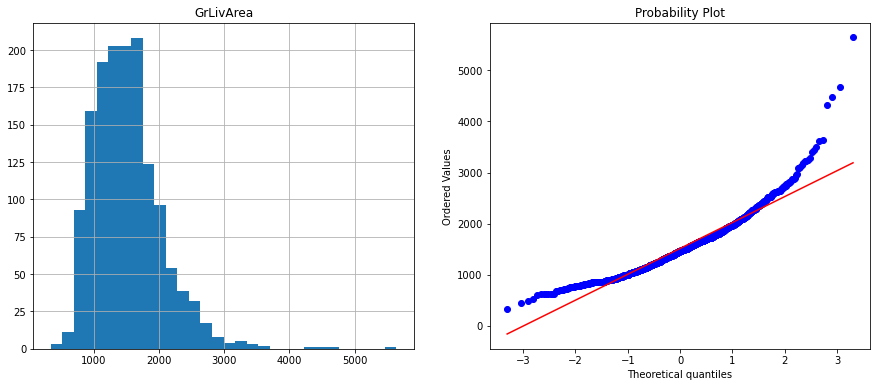

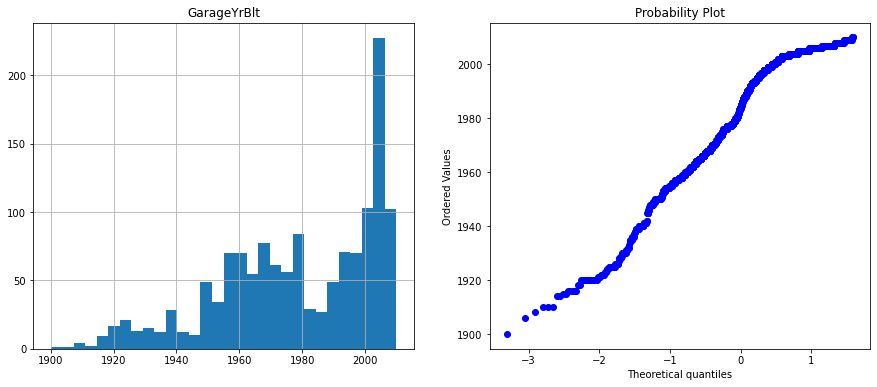

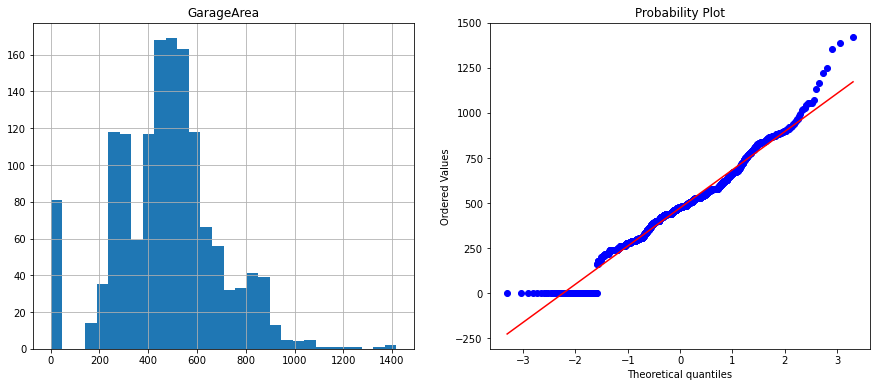

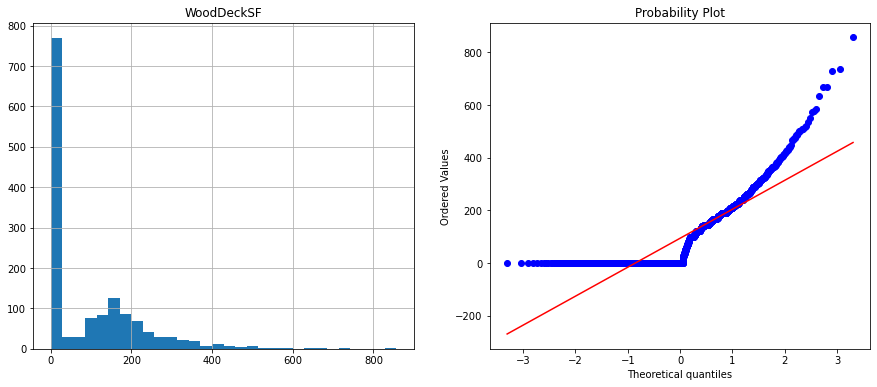

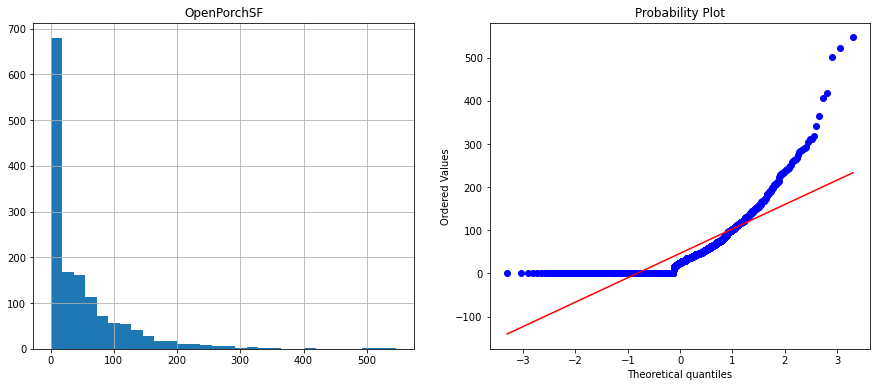

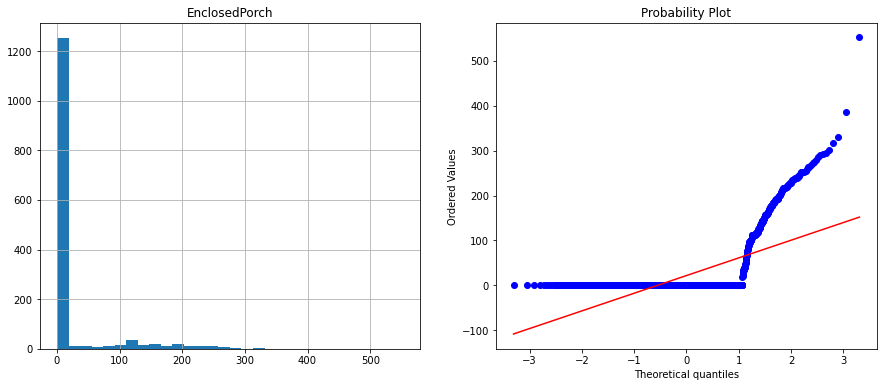

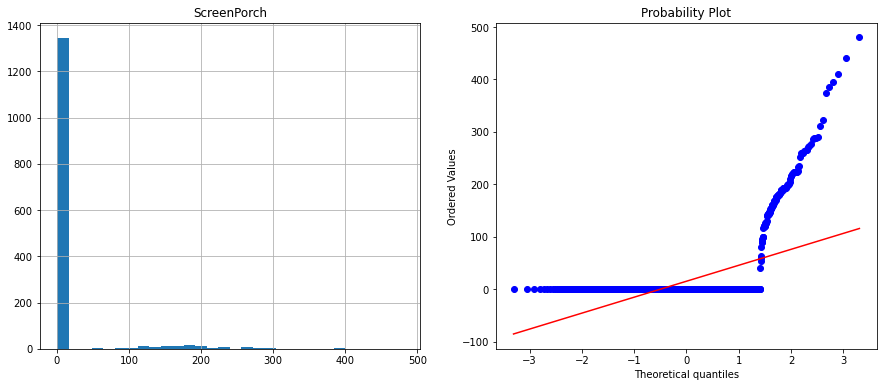

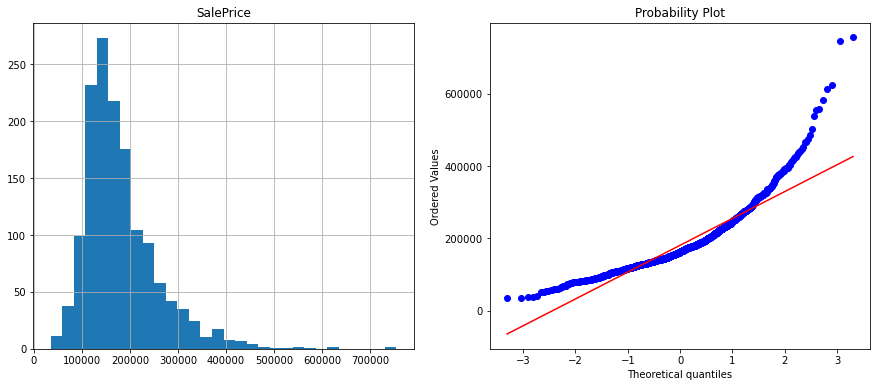

In [196]:
for col in numeric_cont_vars:
        plot_density_variable(dataset, col)

In [197]:
dataset_temp = dataset.loc[:, ['LotArea', 'SalePrice']]
dataset_temp.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


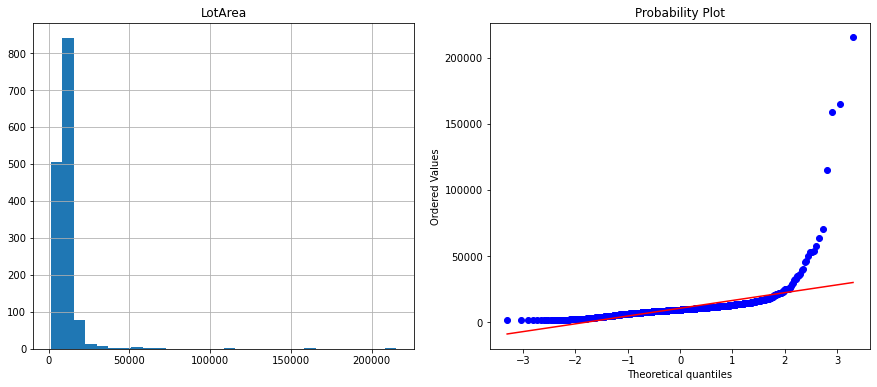

In [198]:
plot_density_variable(dataset, 'LotArea')

### Transformación Logarítmica

In [199]:
dataset_temp['LotArea_log'] = np.log(dataset['LotArea'])

In [200]:
dataset_temp.head()

,LotArea,SalePrice,LotArea_log
0,8450,208500,9.041922
1,9600,181500,9.169518
2,11250,223500,9.328123
3,9550,140000,9.164296
4,14260,250000,9.565214


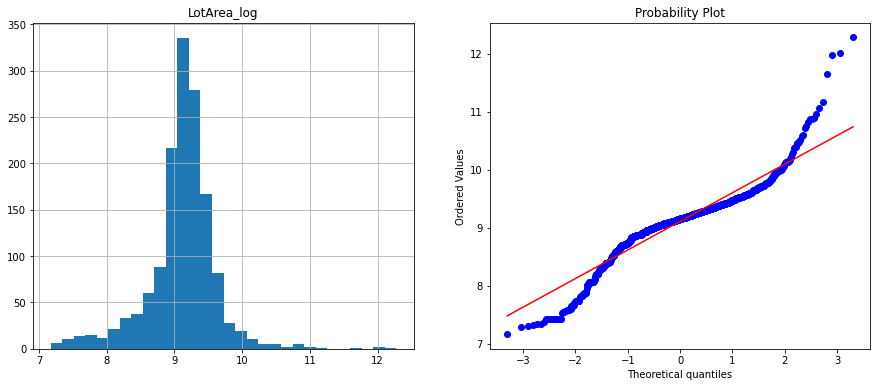

In [201]:
plot_density_variable(dataset_temp, 'LotArea_log')

In [202]:
np.corrcoef(dataset_temp['LotArea_log'], dataset_temp['SalePrice'])[0, 1]

0.3885202679345966

### Transformación Inversa

In [203]:
dataset_temp['LotArea_inv'] = (1 / dataset['LotArea'])

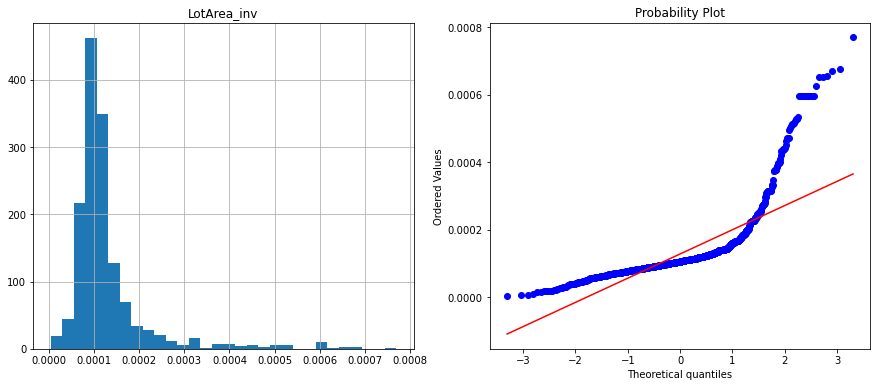

In [204]:
plot_density_variable(dataset_temp, 'LotArea_inv')

In [205]:
np.corrcoef(dataset_temp['LotArea_inv'], dataset_temp['SalePrice'])[0, 1]

-0.29507440361064213

### Transfomación Polinomial de Orden 2

In [206]:
dataset_temp['LotArea_quadratic'] = (dataset['LotArea']**2)

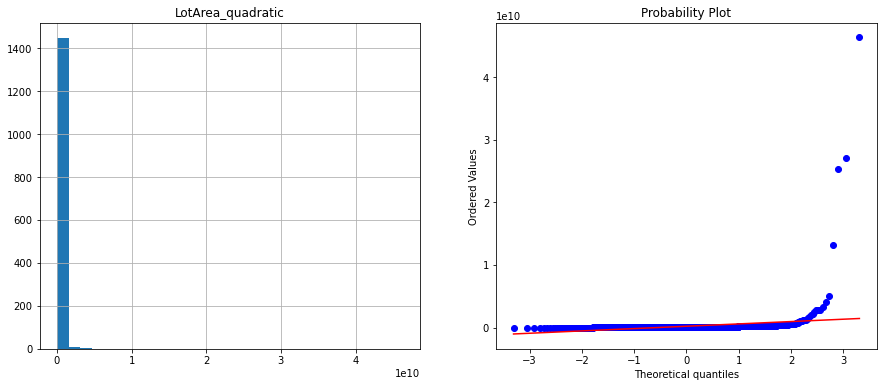

In [207]:
plot_density_variable(dataset_temp, 'LotArea_quadratic')

In [208]:
np.corrcoef(dataset_temp['LotArea_quadratic'], dataset_temp['SalePrice'])[0, 1]

0.11446844700039827

### Transformación de BoxCox

In [209]:
import scipy.stats as stats

In [210]:
dataset_temp['LotArea_boxCox'], lambdaX = stats.boxcox(dataset_temp['LotArea'])

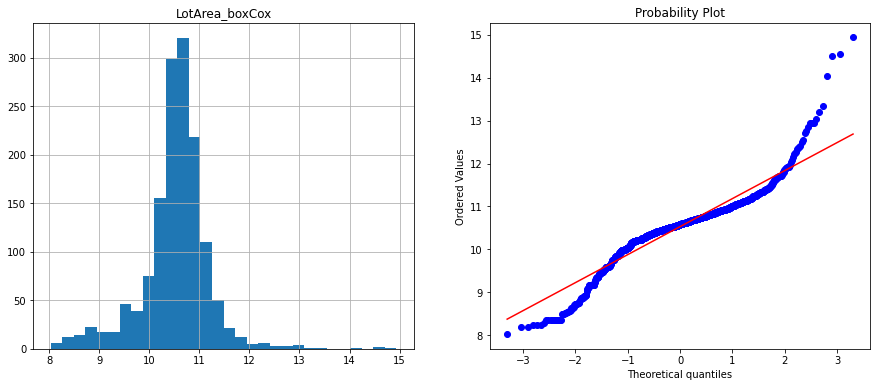

In [211]:
plot_density_variable(dataset_temp, 'LotArea_boxCox')

In [212]:
np.corrcoef(dataset_temp['LotArea_boxCox'], dataset_temp['SalePrice'])[0, 1]

0.38951441164829076

### Transformación de YeoJohnson

In [213]:
dataset_temp['LotArea_YJ'], lambdaX = stats.yeojohnson(dataset_temp['LotArea'])

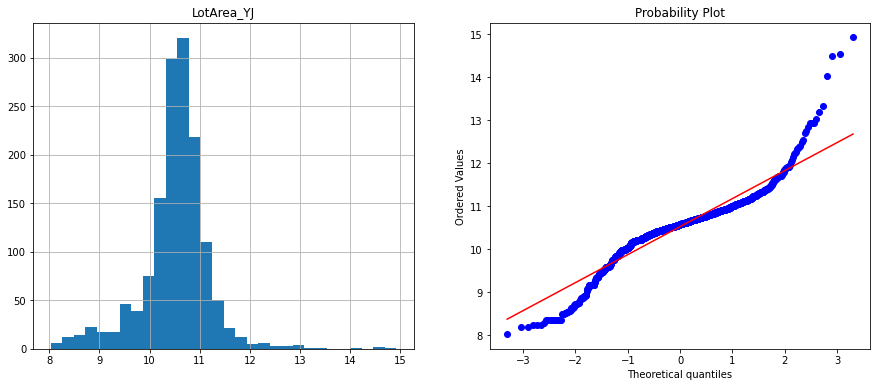

In [214]:
plot_density_variable(dataset_temp, 'LotArea_YJ')

In [215]:
np.corrcoef(dataset_temp['LotArea_YJ'], dataset_temp['SalePrice'])[0, 1]

0.38951784271282075

## Outliers

In [216]:
def inspect_outliers(df, variable):
    
    plt.figure(figsize = (15,6))
    
    plt.subplot(131)
    sns.distplot(df[variable], bins=30)
    plt.title("Densisd-Histograma: " + col)
    
    plt.subplot(132)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title("QQ-Plot: " + col)
    
    plt.subplot(133)
    sns.boxplot(y=df[variable])
    plt.title("Boxplot: " + col)
    
    plt.show()

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


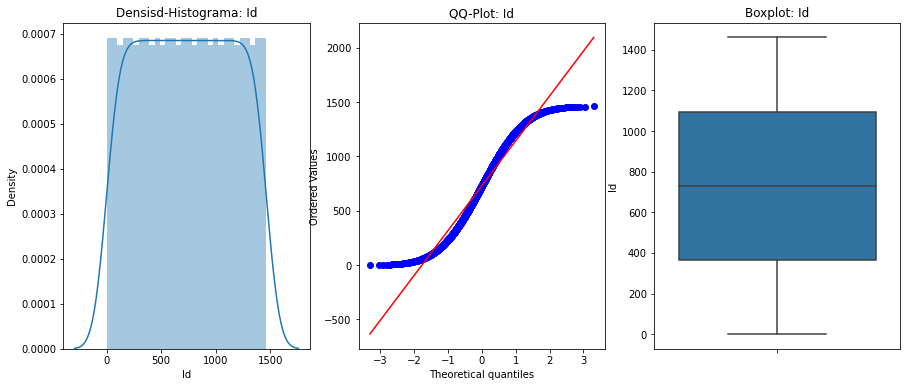

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


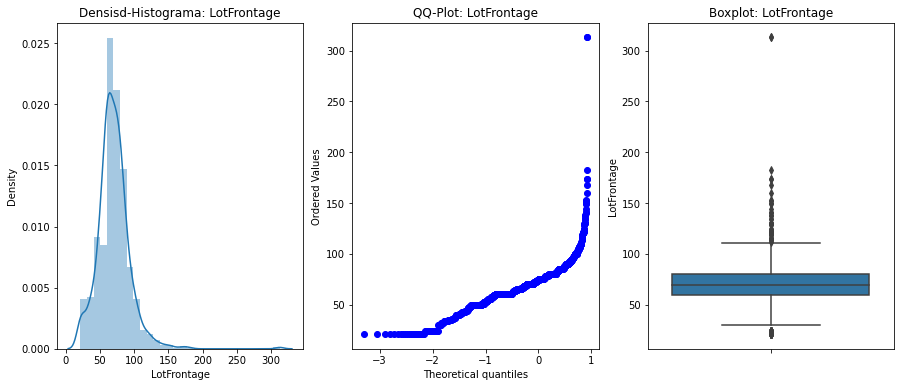

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


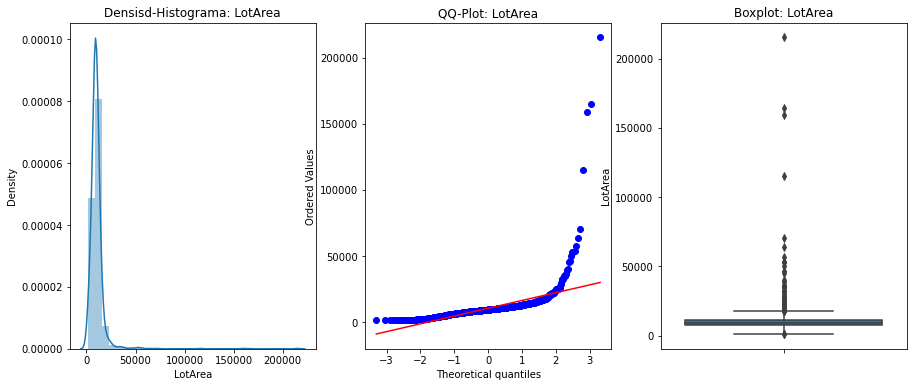

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


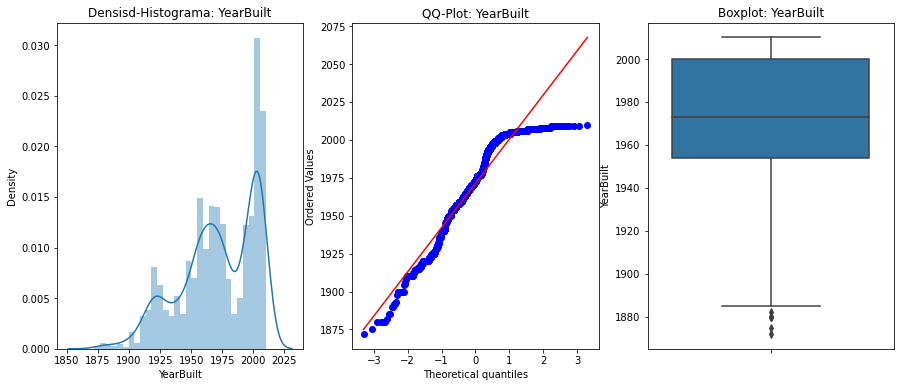

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


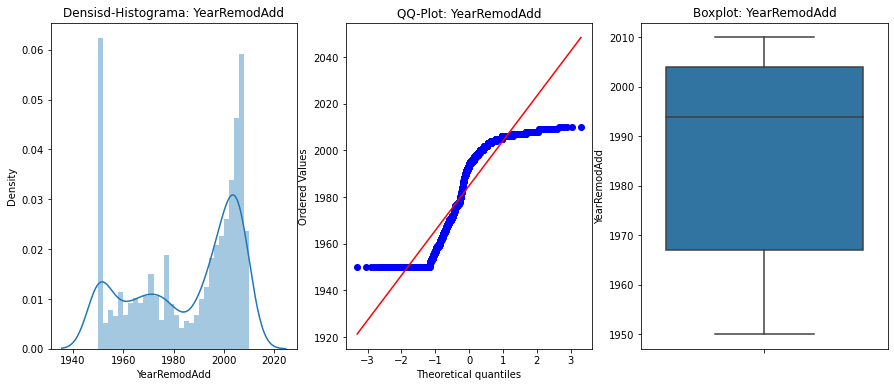

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


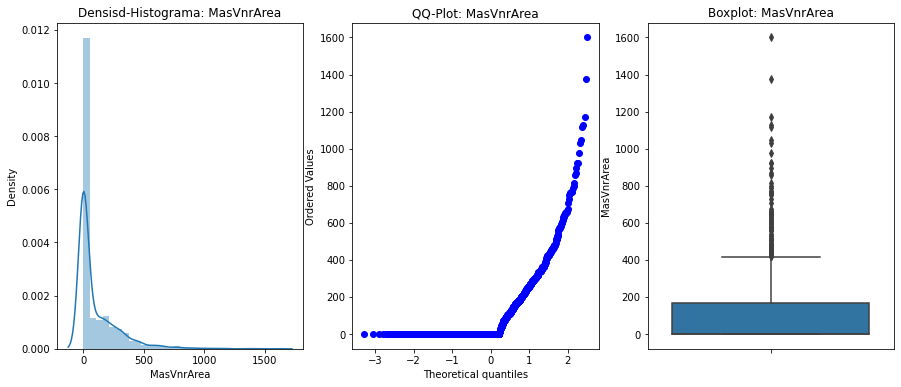

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


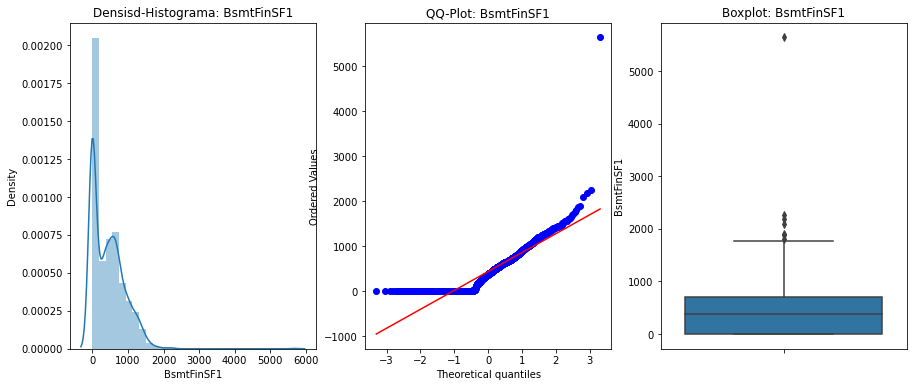

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


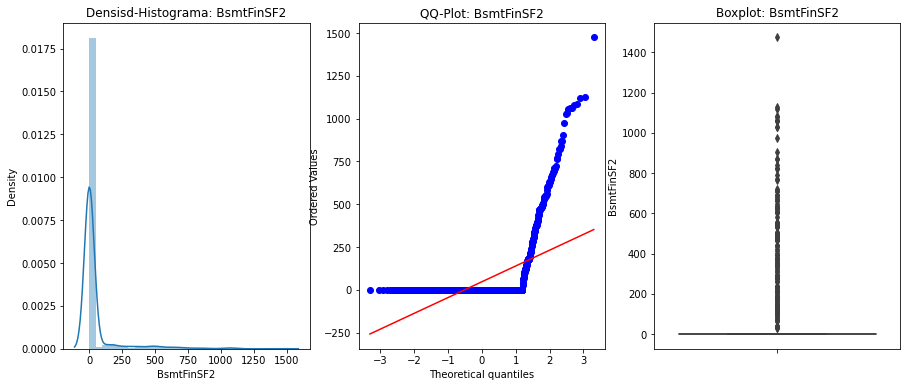

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


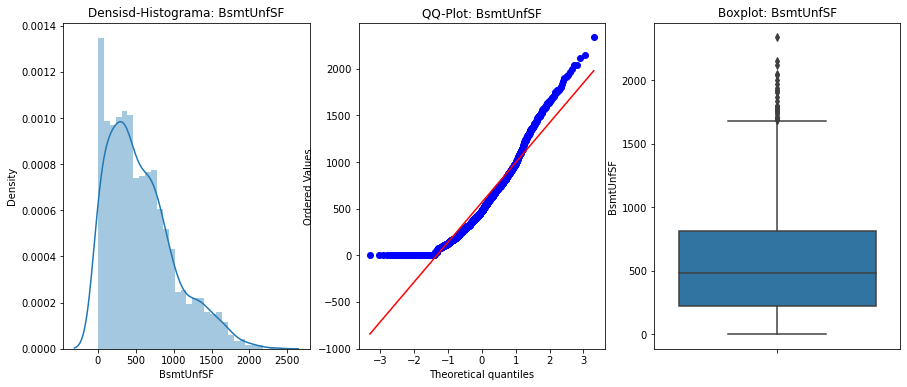

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


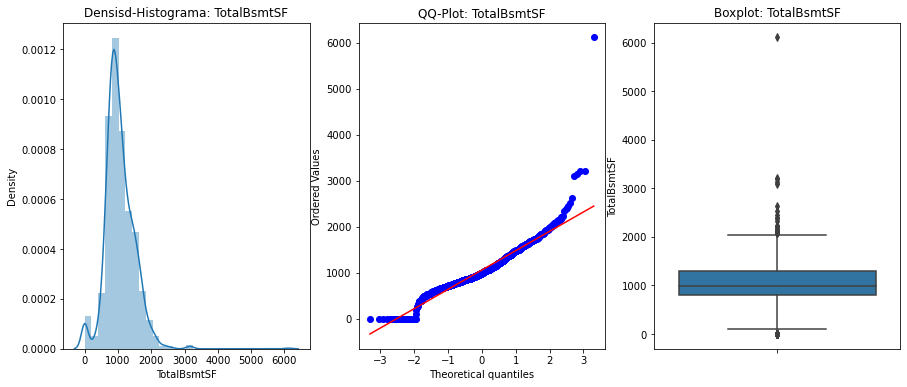

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


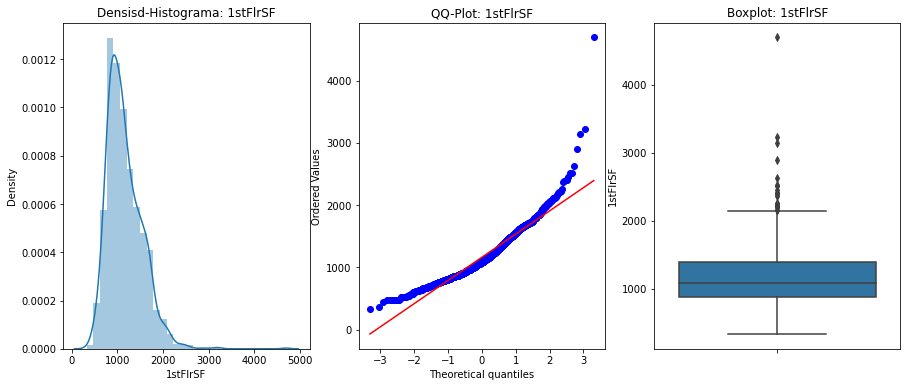

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


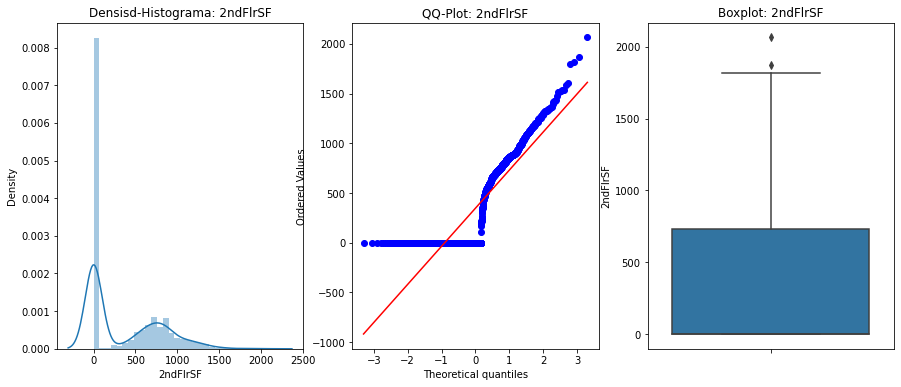

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


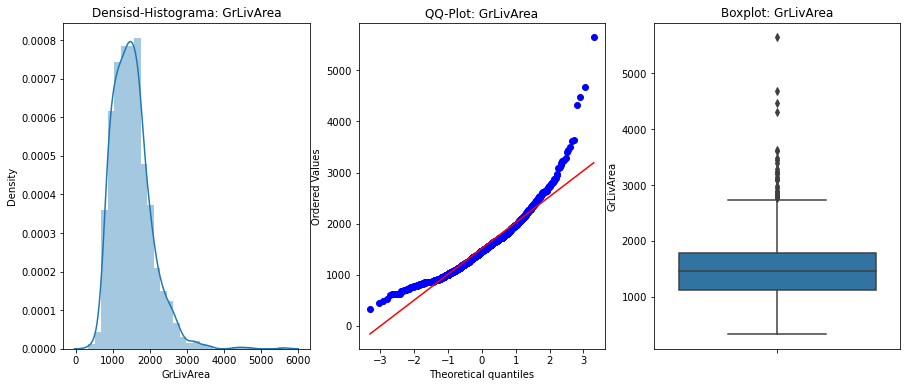

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


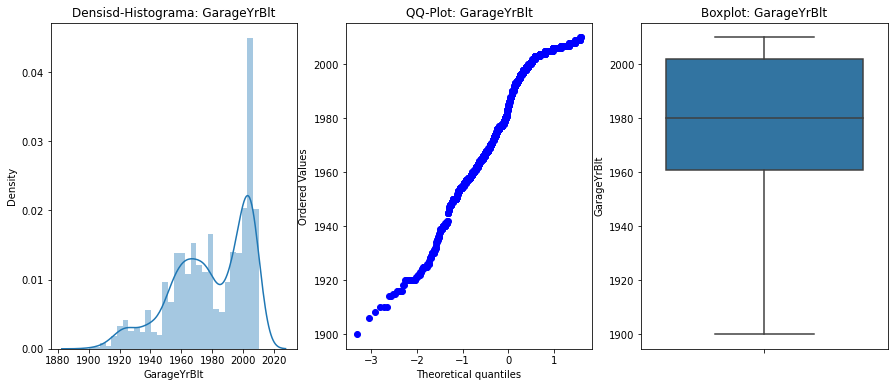

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


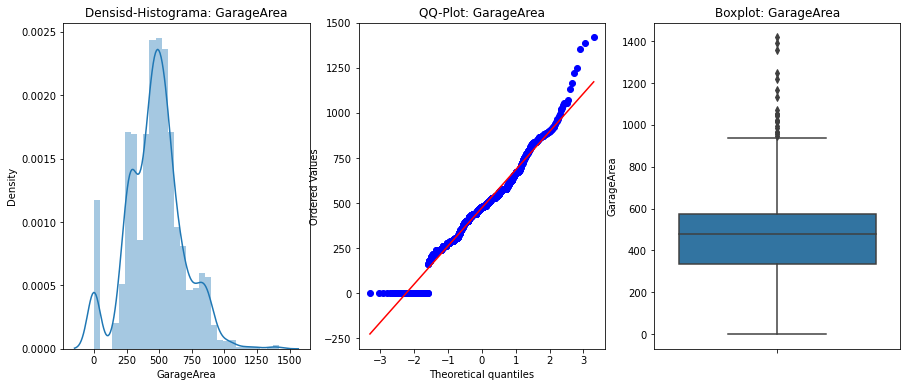

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


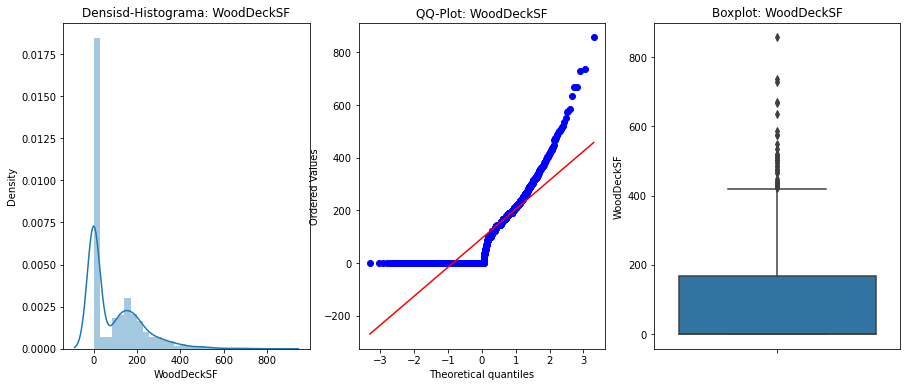

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


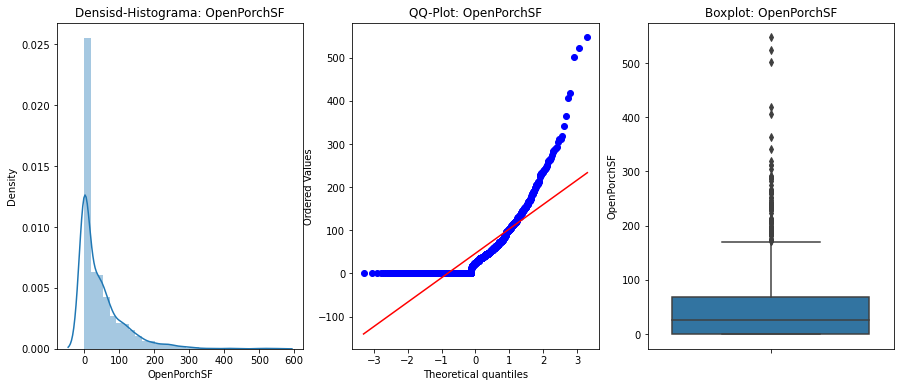

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


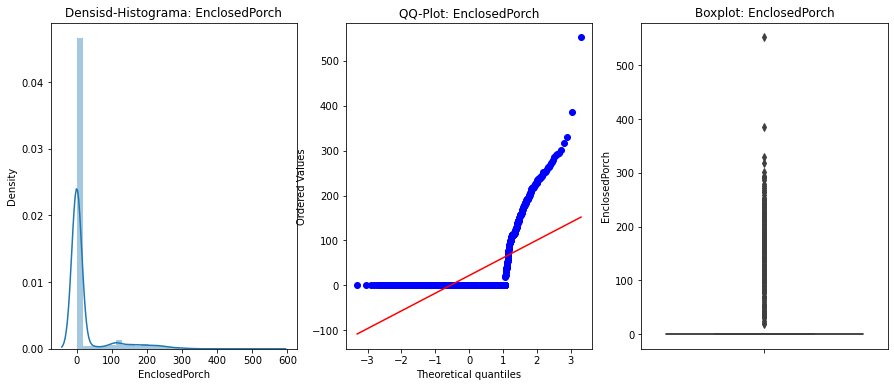

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


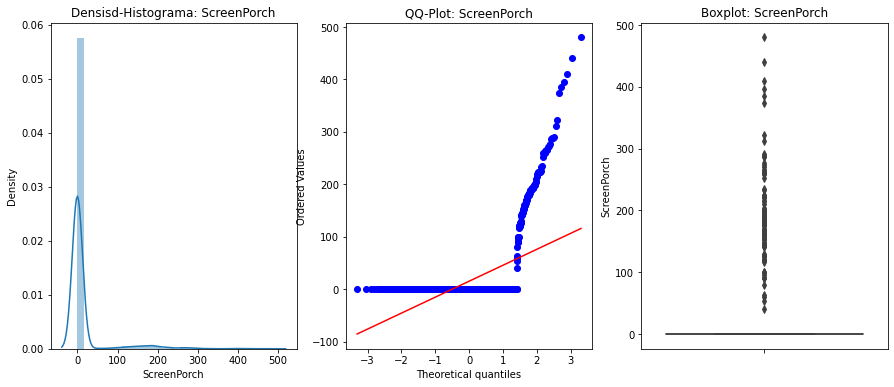

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


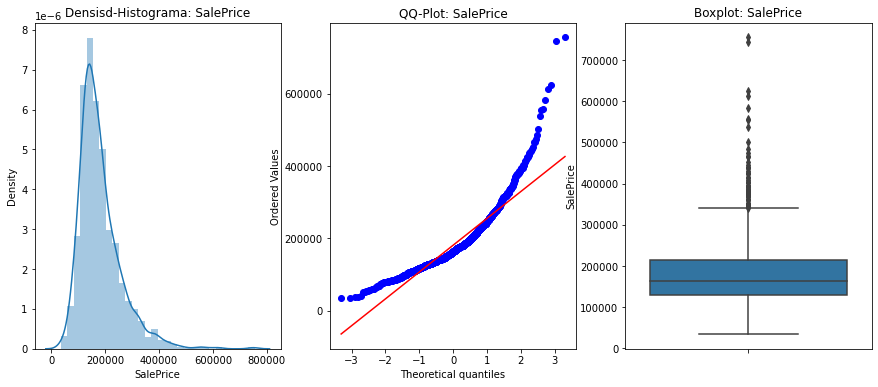

In [217]:
for col in numeric_cont_vars:
    inspect_outliers(dataset, col)

In [218]:
numeric_cont_vars

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [219]:
##Función para detectar outliers
def detect_outliers(df, variable, factor):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    LI = df[variable].quantile(0.25) - (IQR*factor)
    LS = df[variable].quantile(0.75) + (IQR*factor)
    
    return LI, LS

In [220]:
detect_outliers(dataset, 'GrLivArea', 1.75)

(-3.1875, 2909.4375)

In [221]:
factor = 1.75

In [222]:
IQR = dataset['LotFrontage'].quantile(0.75) - dataset['LotFrontage'].quantile(0.25)
LI = dataset['LotFrontage'].quantile(0.25) - (IQR*factor)
LS = dataset['LotFrontage'].quantile(0.75) + (IQR*factor)

In [223]:
IQR

21.0

In [224]:
LI

22.25

In [225]:
LS

116.75

In [226]:
temp = dataset[((dataset['LotFrontage'] >= LI) & (dataset['LotFrontage'] <= LS))]
temp

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,1151.0,65.0,8450,1454.0,NaN,925.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,2,2008,1267.0,1198.0,208500
1,2,20,1151.0,80.0,9600,1454.0,NaN,925.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,5,2007,1267.0,1198.0,181500
2,3,60,1151.0,68.0,11250,1454.0,NaN,484.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,9,2008,1267.0,1198.0,223500
3,4,70,1151.0,60.0,9550,1454.0,NaN,484.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,2,2006,1267.0,101.0,140000
4,5,60,1151.0,84.0,14260,1454.0,NaN,484.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,12,2008,1267.0,1198.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,1151.0,62.0,7917,1454.0,NaN,925.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,8,2007,1267.0,1198.0,175000
1456,1457,20,1151.0,85.0,13175,1454.0,NaN,925.0,1311.0,1459.0,...,0,NaN,157.0,NaN,0,2,2010,1267.0,1198.0,210000
1457,1458,70,1151.0,66.0,9042,1454.0,NaN,925.0,1311.0,1459.0,...,0,NaN,59.0,49.0,2500,5,2010,1267.0,1198.0,266500
1458,1459,20,1151.0,68.0,9717,1454.0,NaN,925.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,4,2010,1267.0,1198.0,142125


In [227]:
1 - len(temp)/len(dataset)

0.21986301369863015

#### Capping

In [228]:
dataset_temp = dataset

In [229]:
limites = detect_outliers(dataset_temp, 'LotFrontage', 1.75)
LF_LI, LF_LS = limites

In [230]:
dataset_temp['LotFrontage_cap'] = np.where(dataset_temp['LotFrontage'] > LF_LS, LF_LS,
                                          np.where(dataset_temp['LotFrontage'] < LF_LI, LF_LI, dataset_temp['LotFrontage'])) 

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


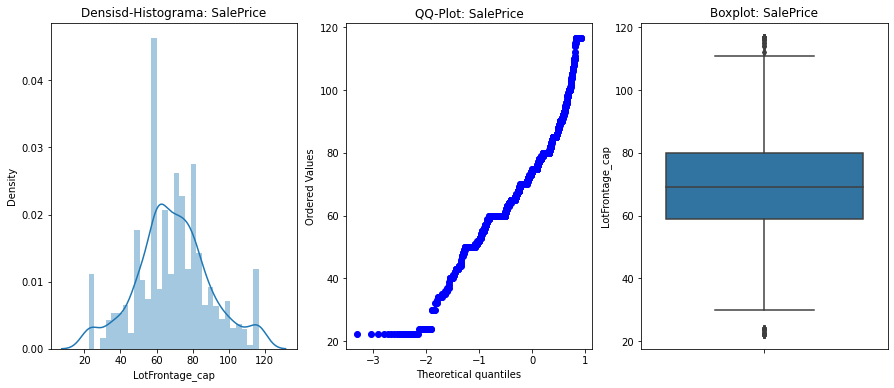

In [231]:
inspect_outliers(dataset_temp, 'LotFrontage_cap')

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


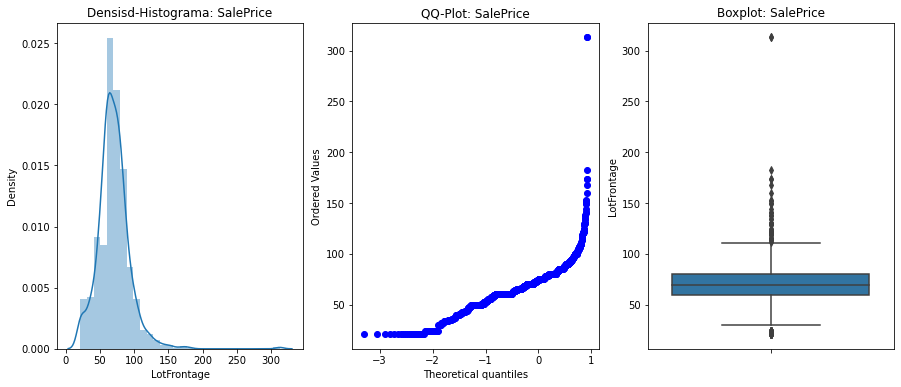

In [232]:
inspect_outliers(dataset_temp, 'LotFrontage')

In [233]:
def outlier_treatment(df, variable, factor):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    LI = df[variable].quantile(0.25) - (IQR*factor)
    LS = df[variable].quantile(0.75) + (IQR*factor)
    
    df[variable] = np.where(df[variable] > LS, LS,
                                          np.where(df[variable] < LI, LI, df[variable])) 
    

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


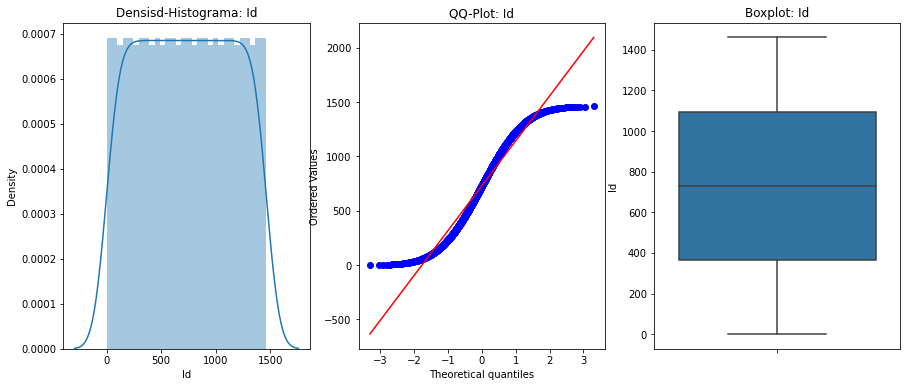

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


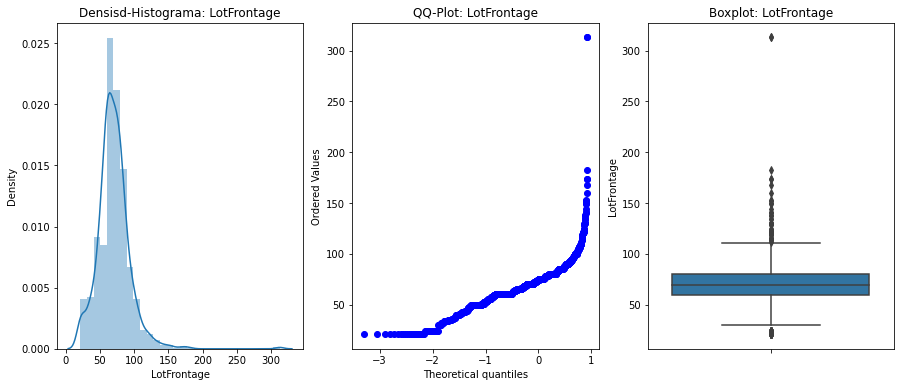

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


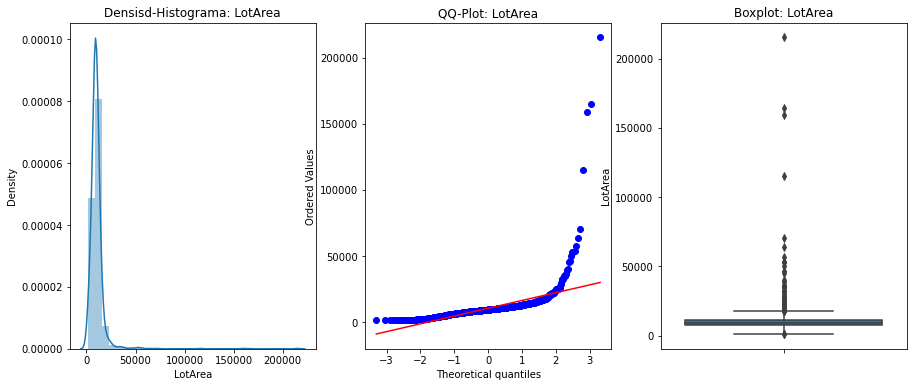

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


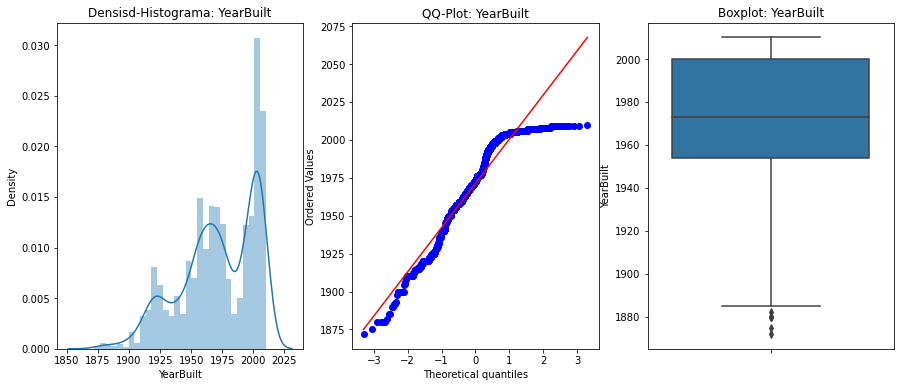

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


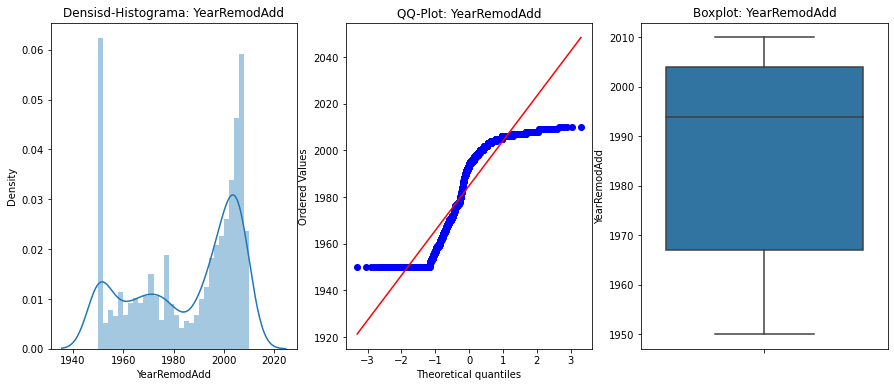

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


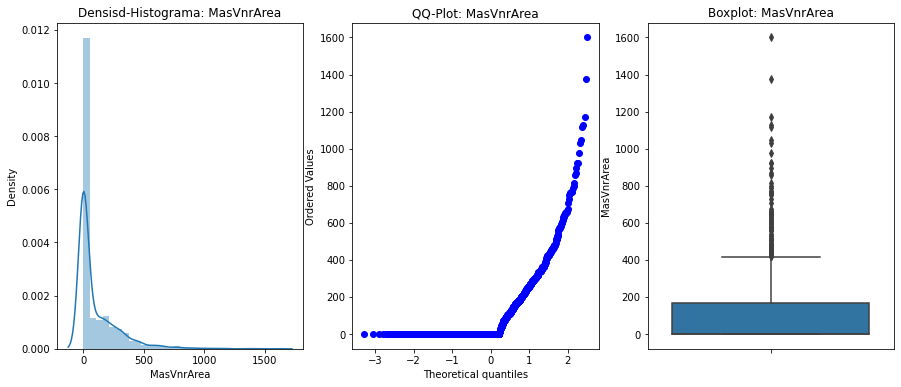

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


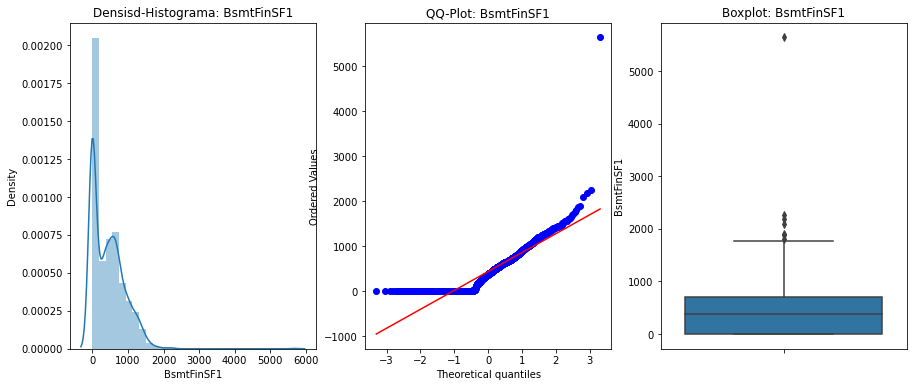

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


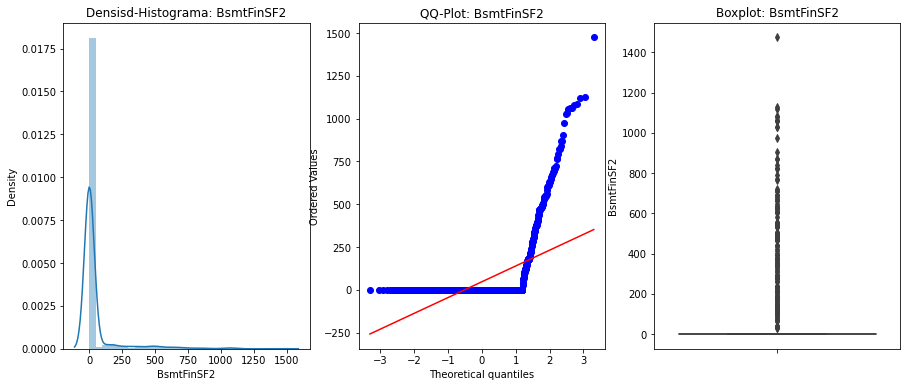

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


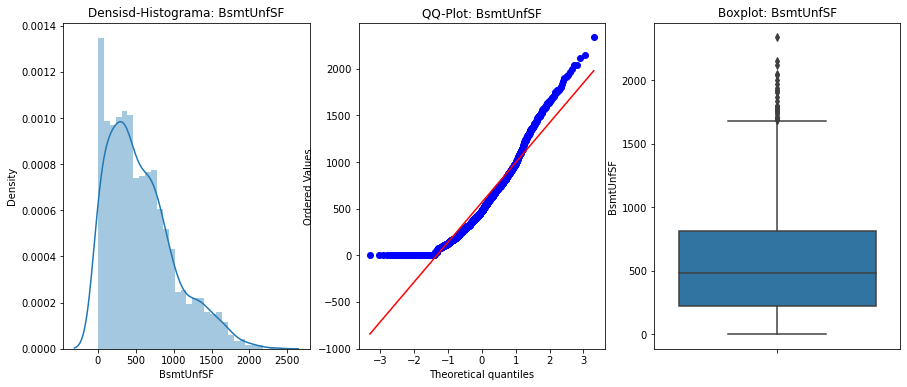

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


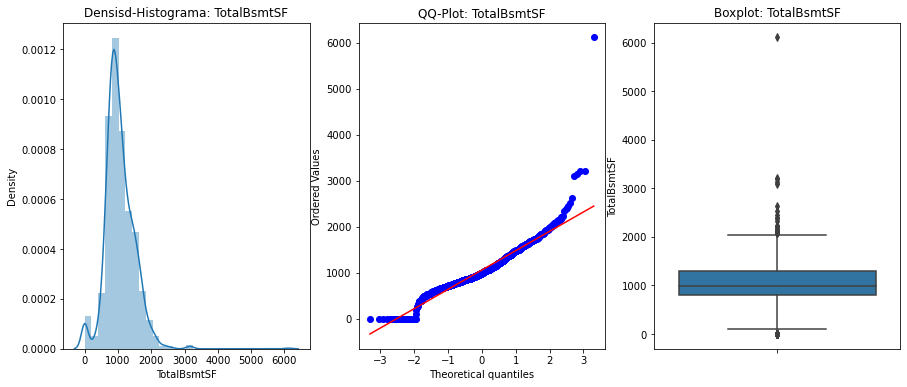

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


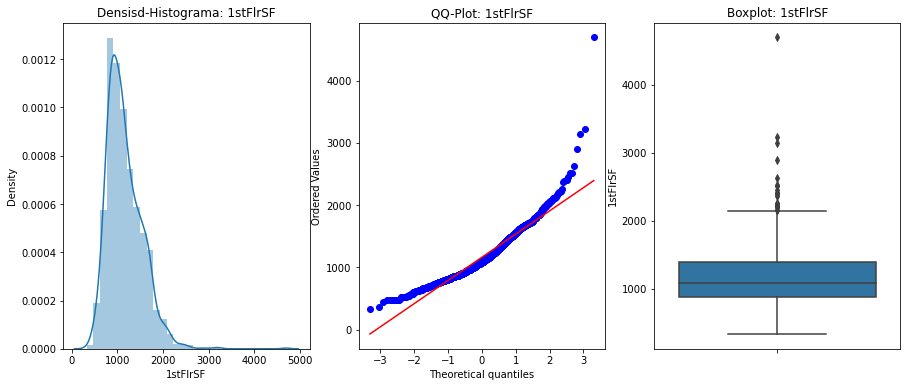

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


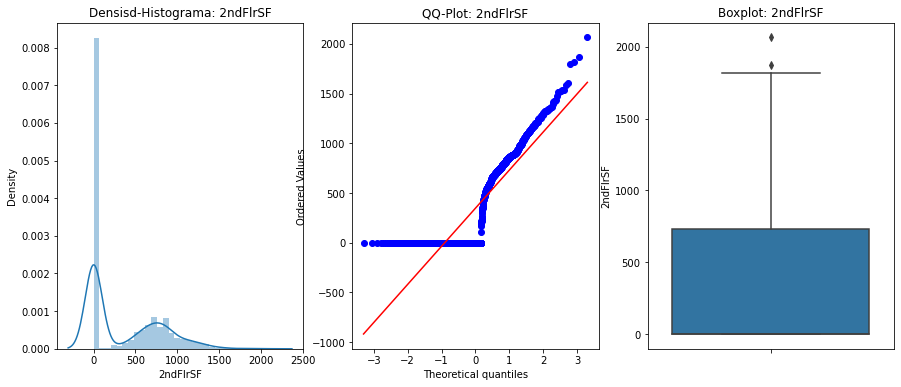

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


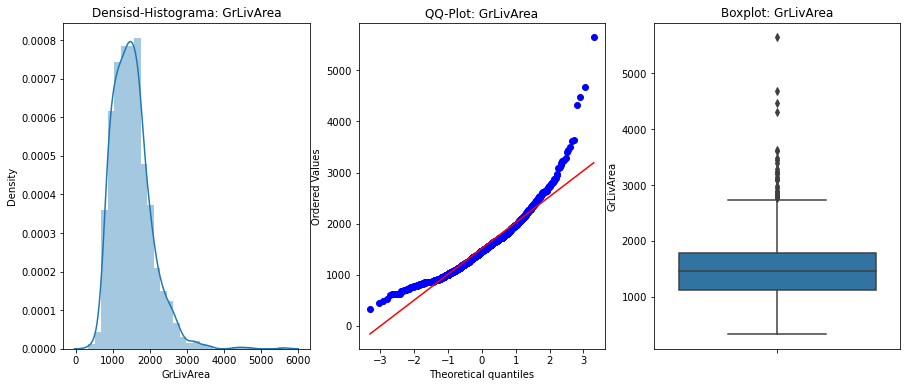

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


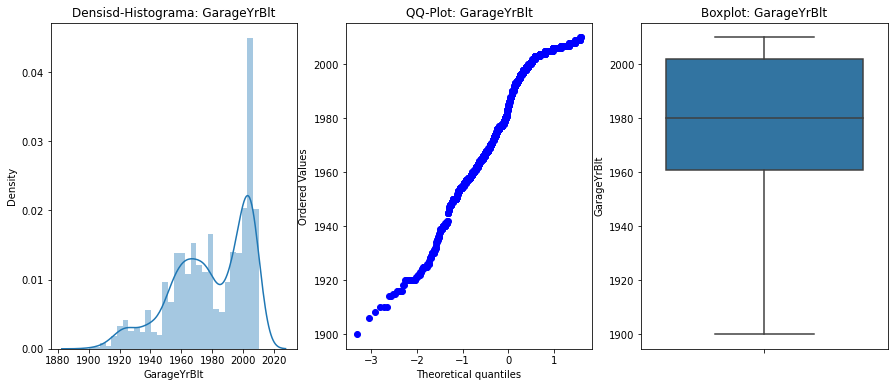

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


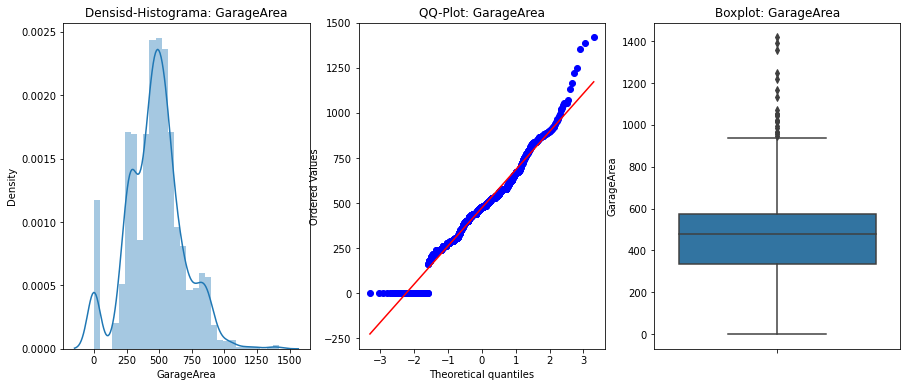

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


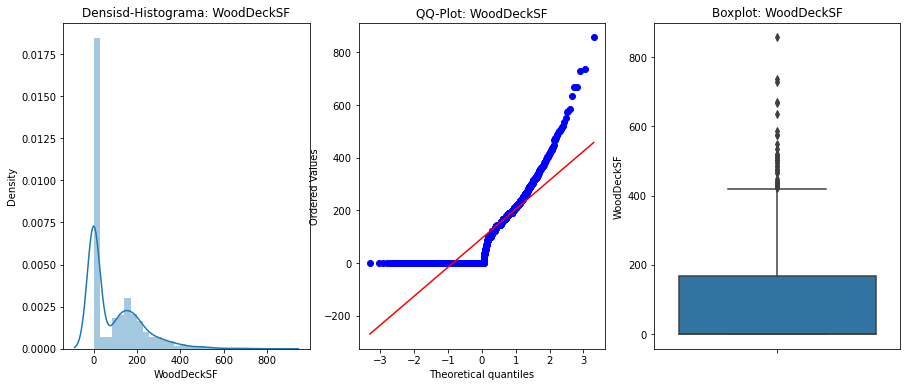

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


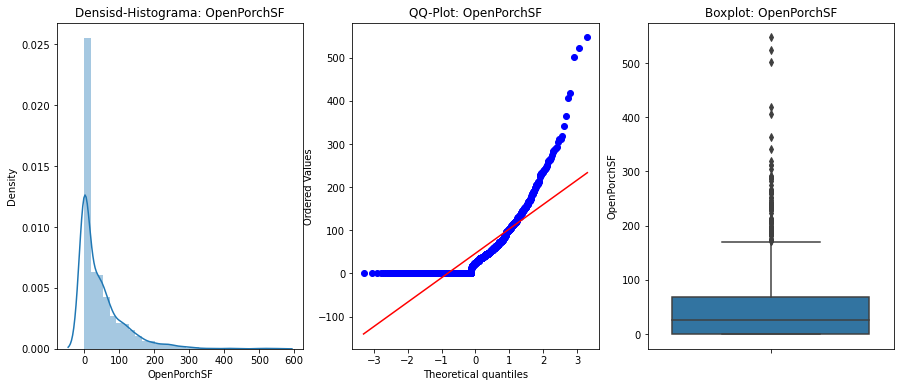

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


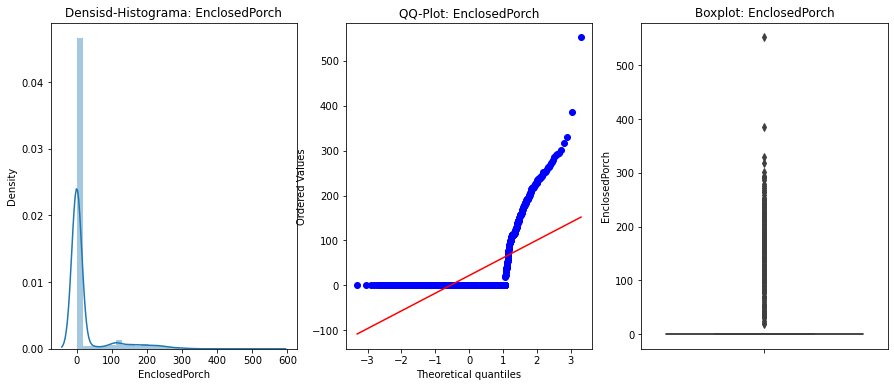

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


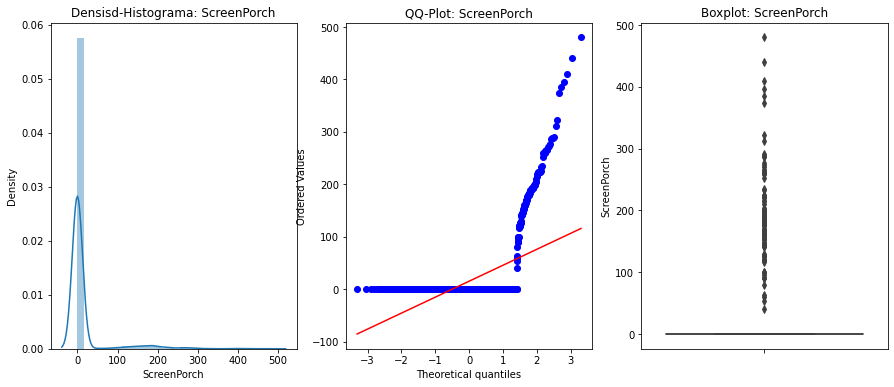

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


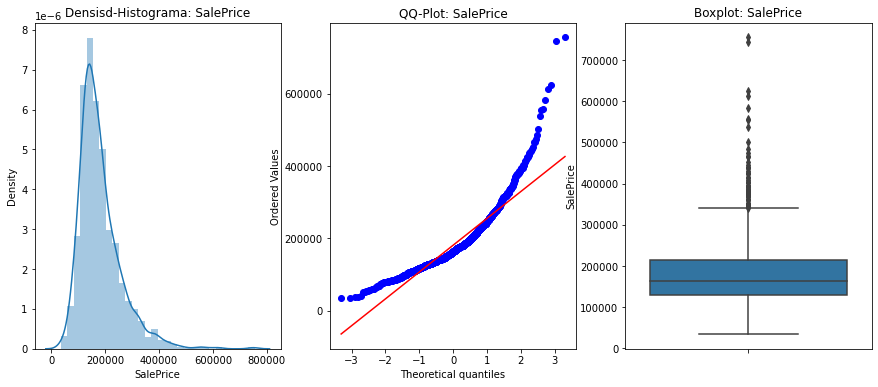

In [234]:
for col in numeric_cont_vars:
    inspect_outliers(dataset, col)

In [235]:
for col in numeric_cont_vars:
    outlier_treatment(dataset, col, 1.75)

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


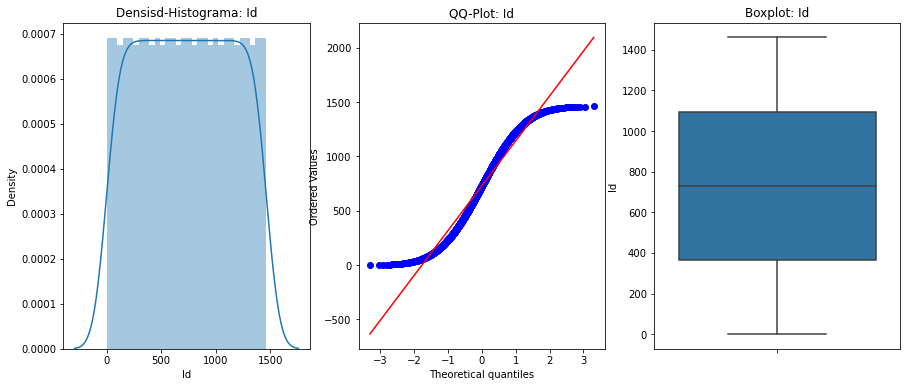

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


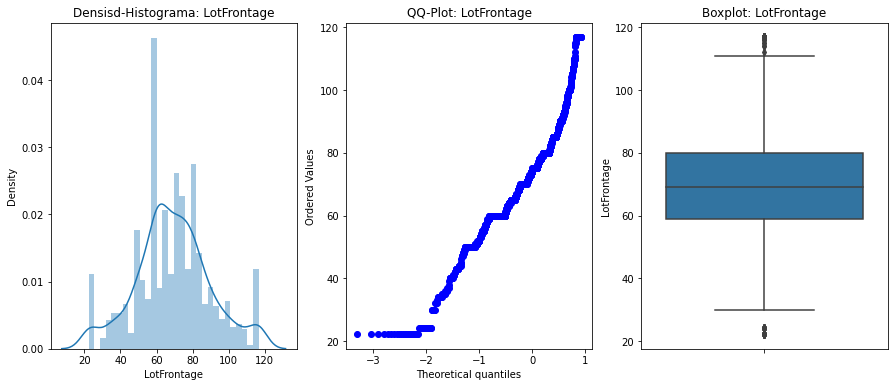

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


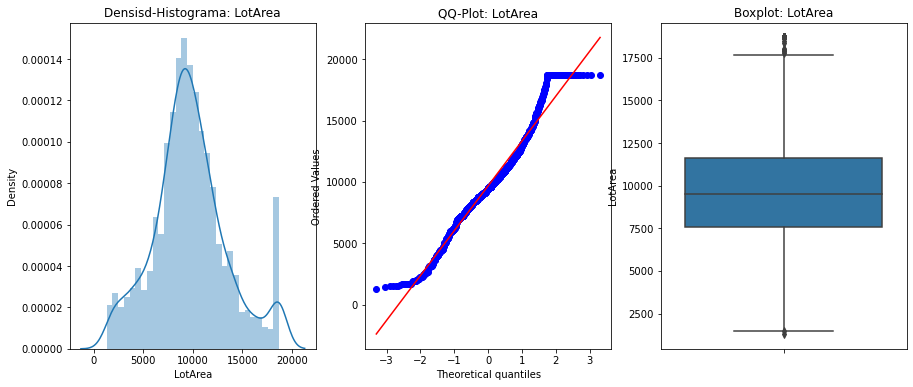

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


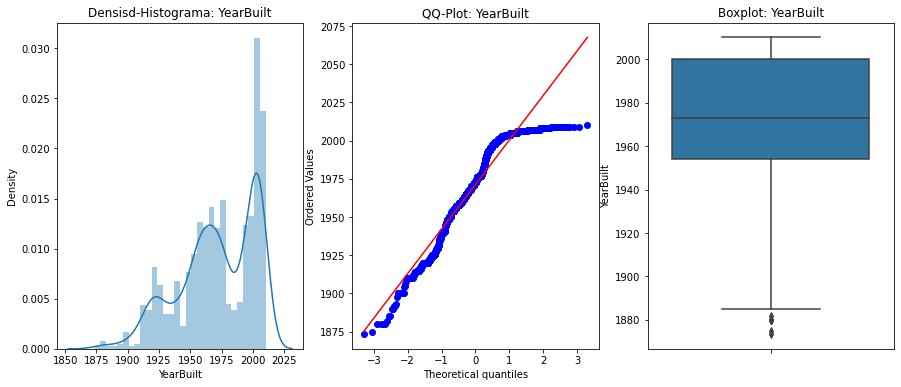

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


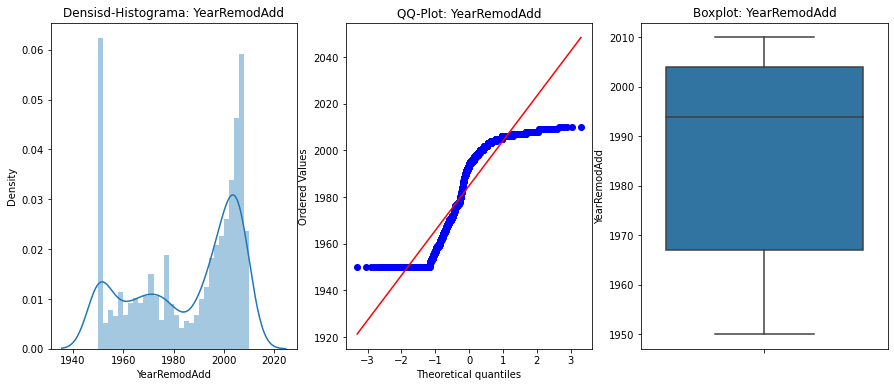

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


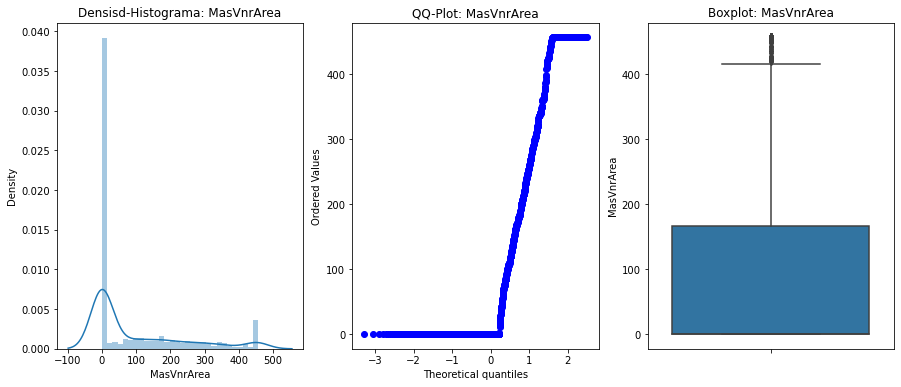

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


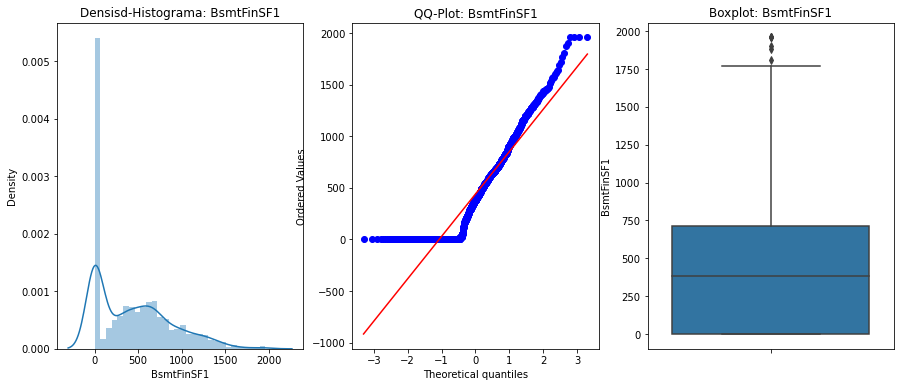

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


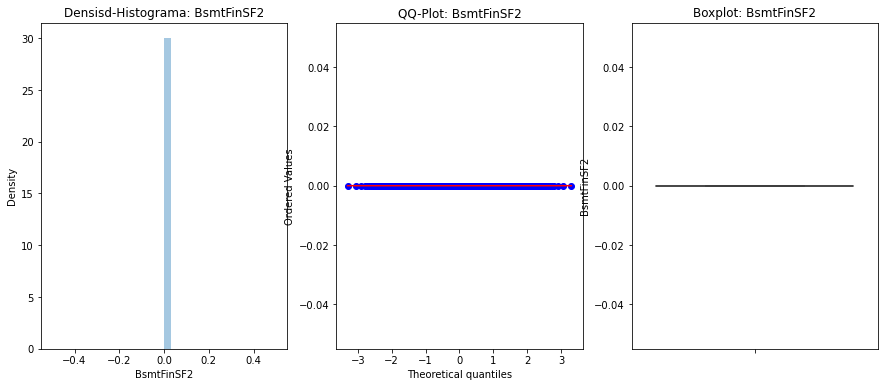

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


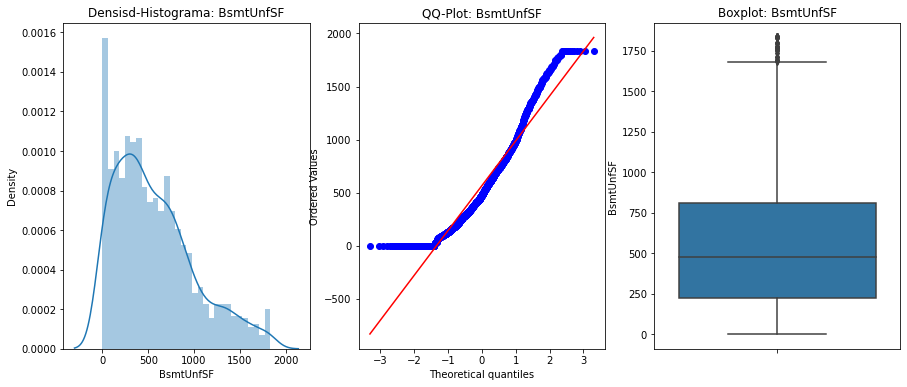

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


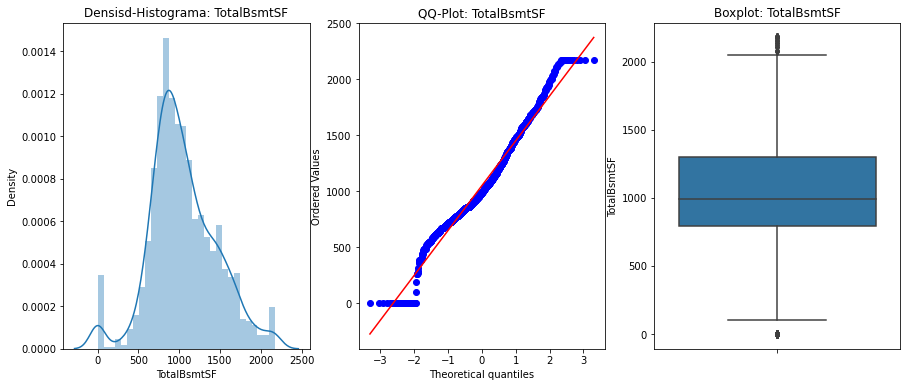

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


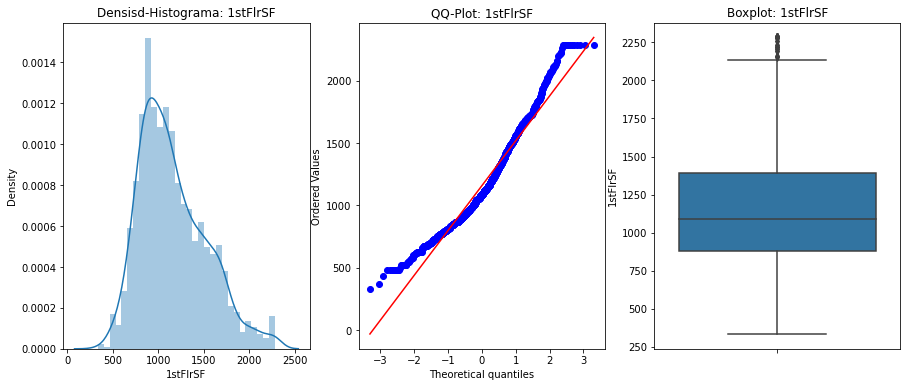

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


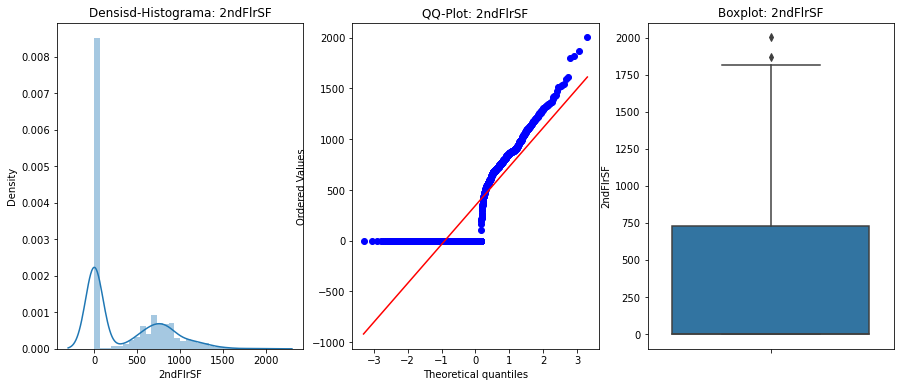

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


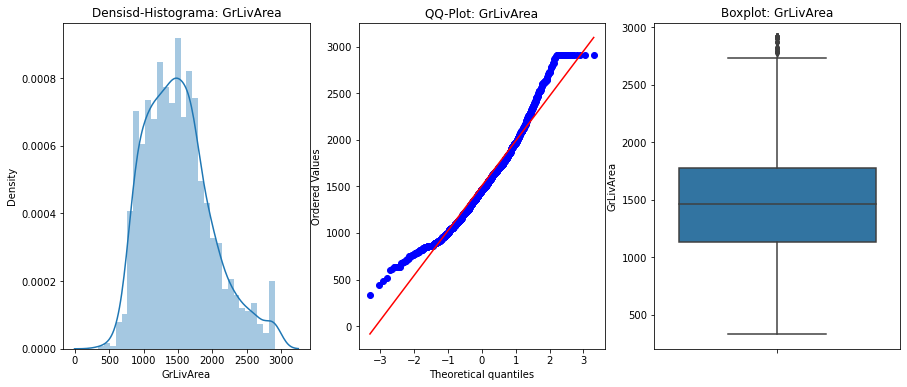

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


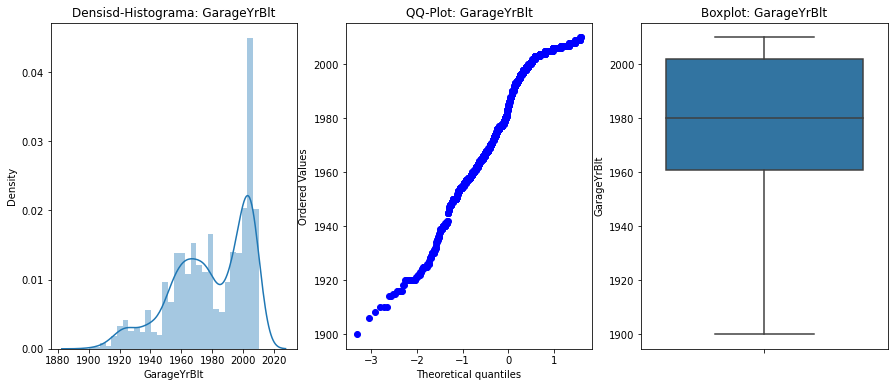

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


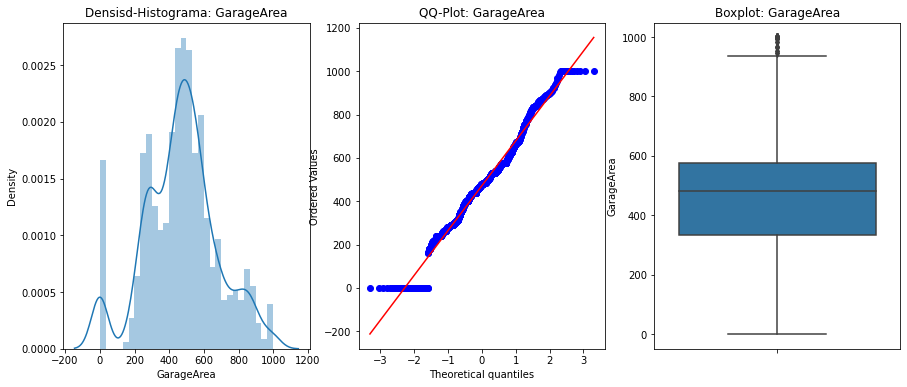

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


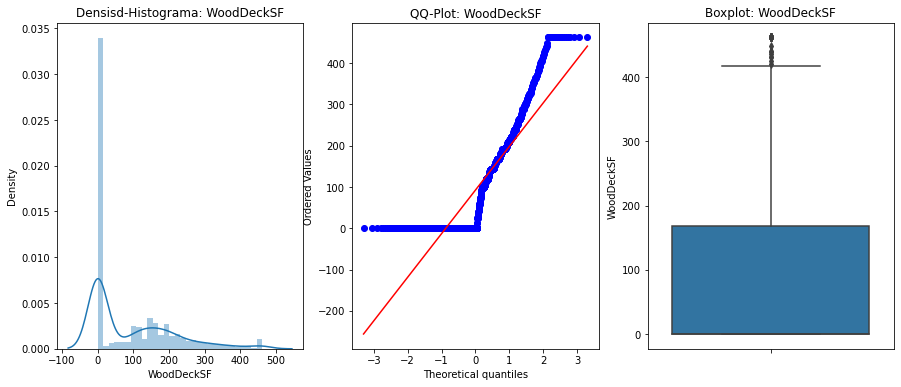

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


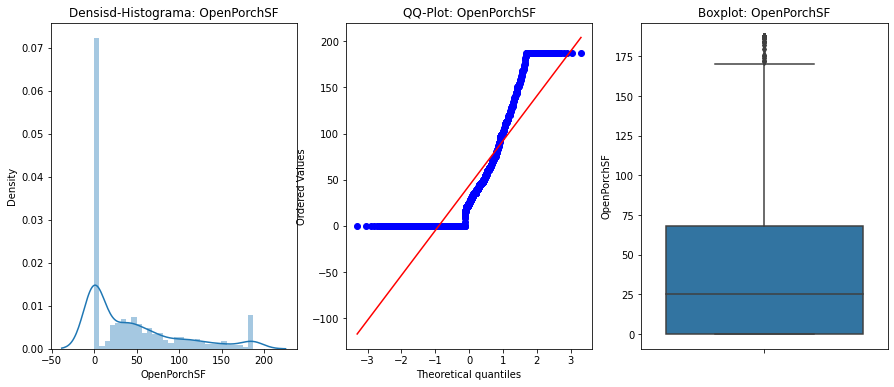

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


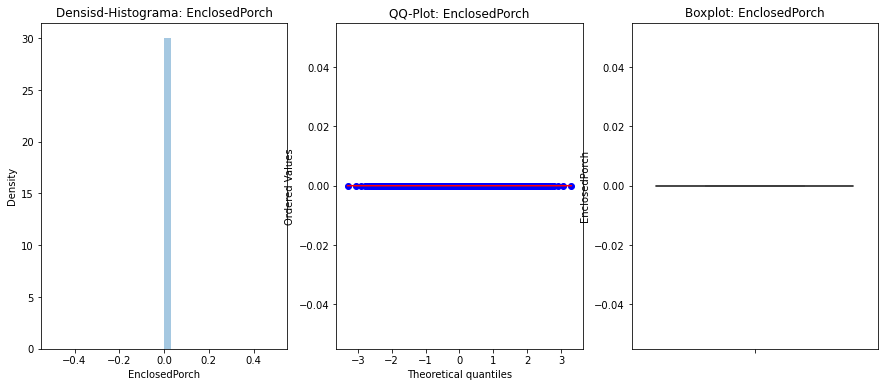

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


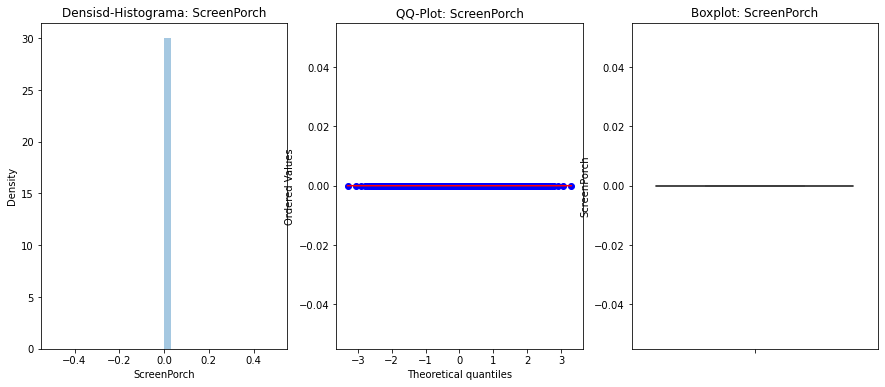

C:\Users\wnajera\Anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


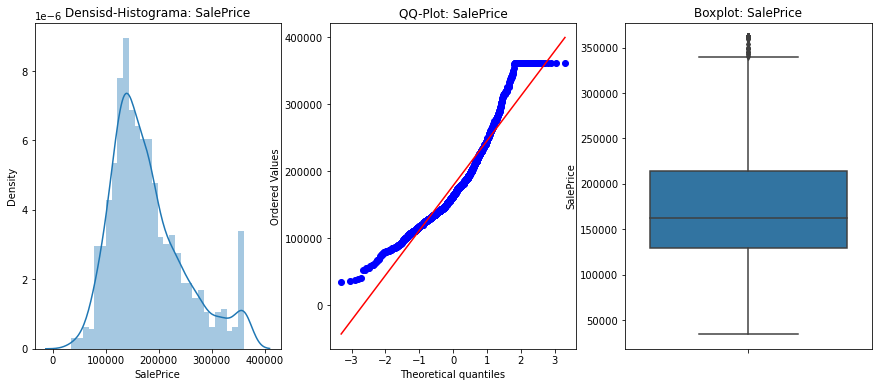

In [236]:
for col in numeric_cont_vars:
    inspect_outliers(dataset, col)

### Feature Scaling

In [237]:
from sklearn.preprocessing import StandardScaler

In [238]:
dataset_temp = dataset.loc[:, numeric_cont_vars]

In [239]:
dataset_temp.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.0,1460.000000
mean,730.500000,69.167361,9690.697260,1971.268836,1984.865753,92.579201,440.658048,0.0,565.710103,1050.829281,1158.344692,346.949315,1506.562842,1978.506164,471.418065,92.574658,43.439041,0.0,0.0,178129.941952
std,421.610009,20.426591,3696.007238,30.199550,20.645407,140.873299,435.379864,0.0,436.981031,404.990571,366.426385,436.361577,489.053055,24.689725,208.887725,118.925700,54.613450,0.0,0.0,69226.276958
min,1.000000,22.250000,1300.000000,1873.500000,1950.000000,0.000000,0.000000,0.0,0.000000,0.000000,334.000000,0.000000,334.000000,1900.000000,0.000000,0.000000,0.000000,0.0,0.0,34900.000000
25%,365.750000,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.0,223.000000,795.750000,882.000000,0.000000,1129.500000,1961.000000,334.500000,0.000000,0.000000,0.0,0.0,129975.000000
50%,730.500000,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.0,477.500000,991.500000,1087.000000,0.000000,1464.000000,1980.000000,480.000000,0.000000,25.000000,0.0,0.0,163000.000000
75%,1095.250000,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.0,808.000000,1298.250000,1391.250000,728.000000,1776.750000,2002.000000,576.000000,168.000000,68.000000,0.0,0.0,214000.000000
max,1460.000000,116.750000,18685.500000,2010.000000,2010.000000,456.500000,1958.687500,0.0,1831.750000,2177.625000,2282.437500,2002.000000,2909.437500,2010.000000,998.625000,462.000000,187.000000,0.0,0.0,361043.750000


In [240]:
scaler = StandardScaler()
scaler.fit(dataset_temp) #calcular parámetros de configuración para cada columna.

StandardScaler()

In [241]:
dataset_temp_scaled = pd.DataFrame(scaler.transform(dataset_temp), columns=dataset_temp.columns)

In [243]:
np.round(dataset_temp_scaled.describe(), 2)

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
count,1460.00,1201.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.0,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.0,1460.0,1460.00
mean,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.0,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.0,0.0,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,0.0,1.00
min,-1.73,-2.30,-2.27,-3.24,-1.69,-0.66,-1.01,0.0,-1.30,-2.60,-2.25,-0.80,-2.40,-3.18,-2.26,-0.78,-0.80,0.0,0.0,-2.07
25%,-0.87,-0.50,-0.58,-0.57,-0.87,-0.66,-1.01,0.0,-0.78,-0.63,-0.75,-0.80,-0.77,-0.71,-0.66,-0.78,-0.80,0.0,0.0,-0.70
50%,0.00,-0.01,-0.06,0.06,0.44,-0.66,-0.13,0.0,-0.20,-0.15,-0.19,-0.80,-0.09,0.06,0.04,-0.78,-0.34,0.0,0.0,-0.22
75%,0.87,0.53,0.52,0.95,0.93,0.52,0.62,0.0,0.55,0.61,0.64,0.87,0.55,0.95,0.50,0.63,0.45,0.0,0.0,0.52
max,1.73,2.33,2.43,1.28,1.22,2.58,3.49,0.0,2.90,2.78,3.07,3.79,2.87,1.28,2.52,3.11,2.63,0.0,0.0,2.64


In [245]:
WN9630850_T4 = dataset_temp_scaled

### Generación de DataSet Final, se agrega al repositorio de GIT, Favor verificar los dos archivos solicitados para la tarea
### como T4, gracias

In [246]:
WN9630850_T4.to_csv('C:/Users/wnajera/Desktop/Maestría BI/6to Trim/Statistical learning/WN9630850_T4.csv',index=False)

Con el dataset de houseprices, aplicar todas las transformaciones del pipeline de ingenieíra de características vistas en clase, deben entregar el notebook y un archivo .csv con el dataset final.